**Problem Statement**

An oil spill is the release of a liquid petroleum hydrocarbon into the environment, especially the marine ecosystem, due to human activity, and is a form of pollution. An oil spill represents an immediate negative effect on human health.The threat posed to birds, fish, shellfish and crustaceans covers the environmental effects caused by oil spill.The impact these oil spills have on air can't be ignored as the chemicals in crude oil are mostly hydrocarbons that contains toxic chemicals such as benzenes, toluene, poly-aromatic hydrocarbon and oxygenated polycyclic aromatic hydrocarbons.There are numerous impacts which these accidents cause eventually deteriorating our ecosystem and the habitat.Uptil now, no active and viable solution has been found to this issue as the underlying cause of such accidents haven't been discovered yet.

**Uploading the dataset**

In [ ]:
from google.colab import files


uploaded = files.upload()


Saving database (1).csv to database (1).csv


**Importing the required libraries**

In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
!pip install plotly


In [ ]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as py

In [ ]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 123105 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.4.0-2ubuntu1.2_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.4.0-2ubuntu1.2) ...
Setting up libarchive-dev:amd64 (3.4.0-2ubuntu1.2) ...
Processing triggers for man-db (2.9.1-1) ...
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.8 MB/s eta 0:00:00
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31629 sha256=c5f89814b4707b100c76073d521b2f38fdbc0b6f6fd05d12d5be90928b14cf5b
  Stored in directory: /root/.cache/pip/wheels/3a/94/d0/6cd83c8a80a4236fd4cb2a1fd846ecf72ab1e0ac238c5951c0
Successfully built libarchive


In [ ]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objects as go
import plotly.tools as tls
from plotly.graph_objs import Line


**Importing the Data**

In [ ]:
oil = pd.read_csv("database (1).csv")

In [ ]:
oil.head()

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,20100016,17305,2010,1/1/2010 7:15,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,20100254,17331,2010,1/4/2010 8:30,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,20100038,17747,2010,1/5/2010 10:30,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
3,20100260,18574,2010,1/6/2010 19:30,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540
4,20100030,16276,2010,1/7/2010 13:00,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650


**Exploring the Dataset**

In [ ]:
oil.shape

(2795, 48)

In [ ]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 48 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Report Number                         2795 non-null   int64  
 1   Supplemental Number                   2795 non-null   int64  
 2   Accident Year                         2795 non-null   int64  
 3   Accident Date/Time                    2795 non-null   object 
 4   Operator ID                           2795 non-null   int64  
 5   Operator Name                         2795 non-null   object 
 6   Pipeline/Facility Name                2674 non-null   object 
 7   Pipeline Location                     2795 non-null   object 
 8   Pipeline Type                         2777 non-null   object 
 9   Liquid Type                           2795 non-null   object 
 10  Liquid Subtype                        1349 non-null   object 
 11  Liquid Name      

In [ ]:
oil.describe()

,Report Number,Supplemental Number,Accident Year,Operator ID,Accident Latitude,Accident Longitude,Unintentional Release (Barrels),Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),...,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
count,2.795000e+03,2795.000000,2795.000000,2795.000000,2795.000000,2795.000000,2795.000000,1209.000000,2795.000000,2795.000000,...,8.000000,8.000000,8.00000,2.788000e+03,2.791000e+03,2.785000e+03,2.789000e+03,2.787000e+03,2.779000e+03,2.795000e+03
mean,2.013293e+07,19433.319499,2013.187835,21388.476565,35.781608,-95.682691,207.245843,238.533623,75.051792,132.194050,...,0.125000,0.625000,1.25000,1.122963e+05,9.805299e+03,2.512195e+04,2.918911e+05,3.628094e+05,3.435604e+04,8.340332e+05
std,1.982098e+04,1724.815370,1.972102,12430.973428,5.652599,12.328430,1368.667813,2781.771453,546.188247,1185.019252,...,0.353553,0.744024,0.46291,8.709947e+05,6.384075e+04,5.243581e+05,4.617076e+06,1.206887e+07,6.191235e+05,1.657830e+07
min,2.010000e+07,15072.000000,2010.000000,300.000000,18.448010,-158.099930,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.012004e+07,17978.500000,2012.000000,11169.000000,30.909375,-100.587636,0.480000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.00000,1.000000e+02,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.039500e+03
50%,2.013037e+07,19502.000000,2013.000000,26041.000000,34.925440,-95.488870,2.000000,0.000000,0.740000,0.000000,...,0.000000,0.500000,1.00000,3.000000e+03,1.000000e+02,0.000000e+00,2.520000e+03,8.000000e+02,0.000000e+00,2.312900e+04
75%,2.015023e+07,20996.500000,2015.000000,31618.000000,40.264062,-91.089463,20.000000,0.000000,8.000000,2.000000,...,0.000000,1.000000,1.25000,2.500000e+04,7.000000e+02,0.000000e+00,1.550000e+04,1.500000e+04,0.000000e+00,1.172325e+05
max,2.017003e+07,22049.000000,2017.000000,99043.000000,70.261265,104.263399,30565.000000,70191.000000,18245.000000,30565.000000,...,1.000000,2.000000,2.00000,2.700000e+07,1.417839e+06,2.300000e+07,1.770000e+08,6.350000e+08,2.235000e+07,8.405261e+08


**Data Visualization**

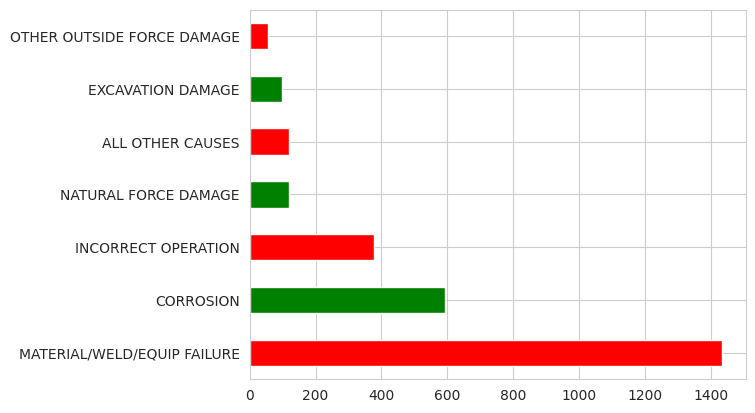

In [ ]:
main_causes = oil['Cause Category'].value_counts()
colors=['#FF0000', '#008000','#FF0000', '#008000','#FF0000', '#008000','#FF0000']
ax=main_causes.plot(kind='barh')
for patch,color in zip(ax.patches,colors):
    patch.set_facecolor(color)


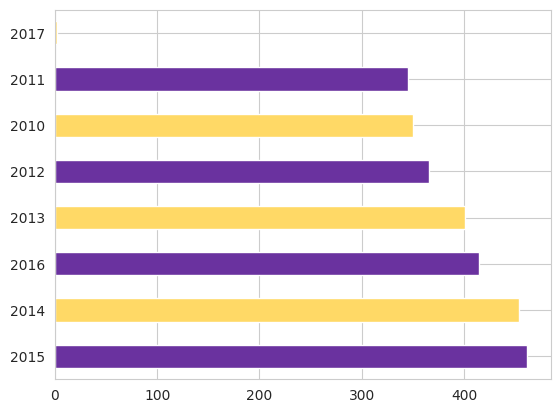

In [ ]:
main_causes = oil['Accident Year'].value_counts()
colors=['#6a329f','#ffd966','#6a329f','#ffd966','#6a329f','#ffd966','#6a329f','#ffd966']
ax=oil['Accident Year'].value_counts().plot(kind='barh')
for patch,color in zip(ax.patches,colors):
    patch.set_facecolor(color)

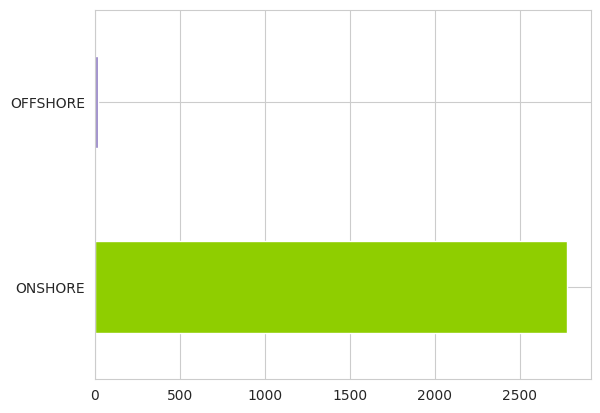

In [ ]:
main_causes = oil['Pipeline Location'].value_counts()
colors=['#8fce00','#8e7cc3']
ax=oil['Pipeline Location'].value_counts().plot(kind='barh')
for patch,color in zip(ax.patches,colors):
    patch.set_facecolor(color)

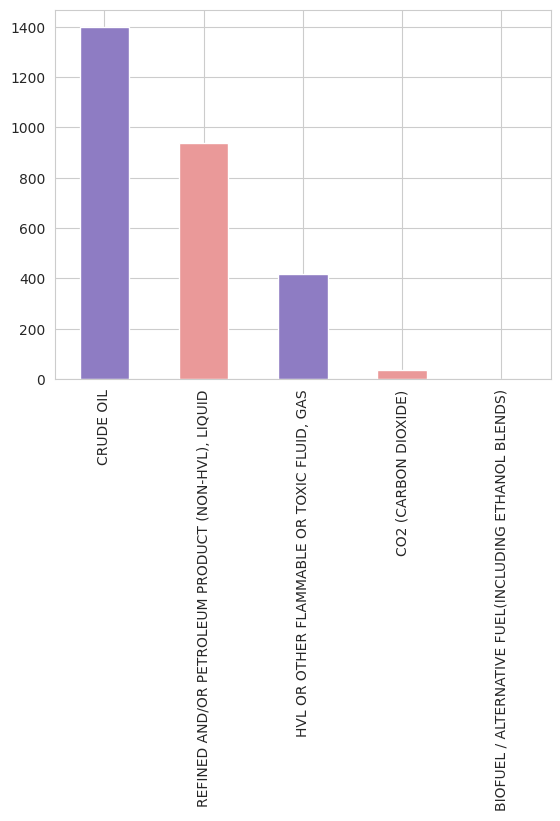

In [ ]:
main_causes = oil['Liquid Type'].value_counts()
colors=['#8e7cc3','#ea9999','#8e7cc3','#ea9999']
ax=oil['Liquid Type'].value_counts().plot(kind='bar')
for patch,color in zip(ax.patches,colors):
    patch.set_facecolor(color)

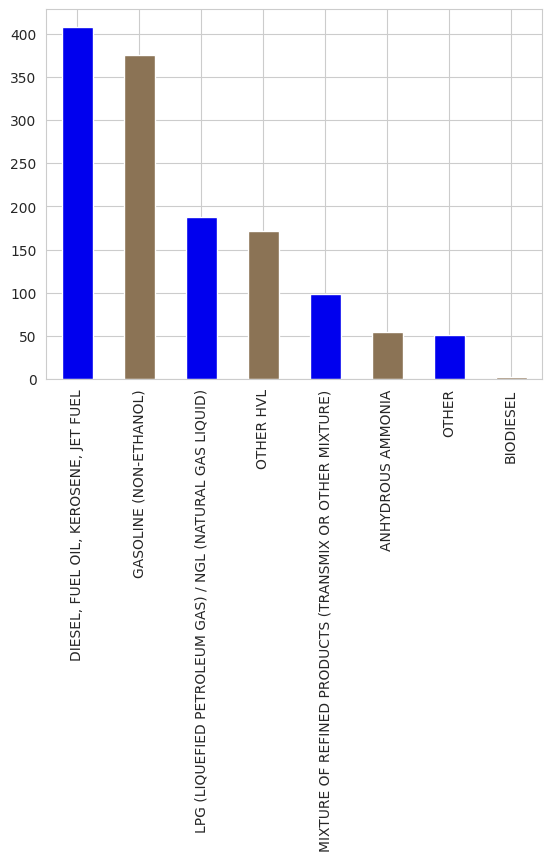

In [ ]:
main_causes = oil['Liquid Subtype'].value_counts()
colors=['#0000EE', '#8B7355','#0000EE','#8B7355', '#0000EE', '#8B7355', '#0000EE', '#8B7355',]
ax=oil['Liquid Subtype'].value_counts().plot(kind='bar')
for patch,color in zip(ax.patches,colors):
    patch.set_facecolor(color)


<Axes: >

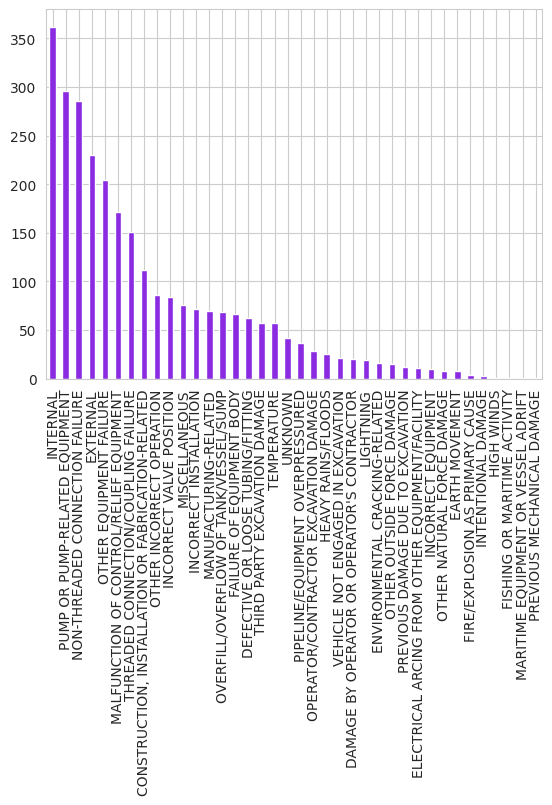

In [ ]:
main_causes = oil['Cause Subcategory'].value_counts()
oil['Cause Subcategory'].value_counts().plot(kind='bar', color= 'blueviolet')


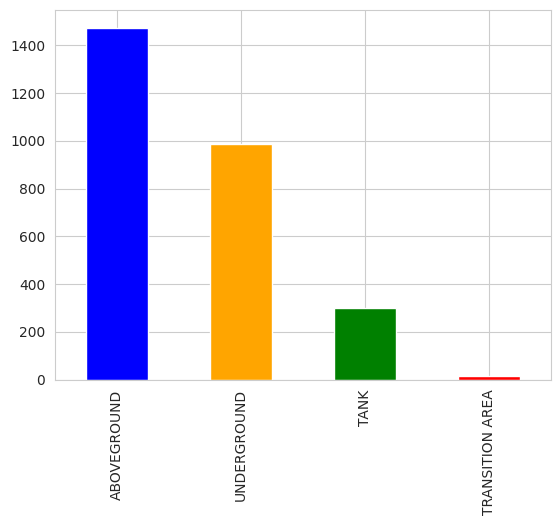

In [ ]:
main_causes = oil['Pipeline Type'].value_counts()
colors=['#0000FF', '#FFa500','#008000', '#ff0000']
ax=oil['Pipeline Type'].value_counts().plot(kind='bar')
for patch,color in zip(ax.patches,colors):
    patch.set_facecolor(color)

<Axes: xlabel='Pipeline Type', ylabel='All Costs'>

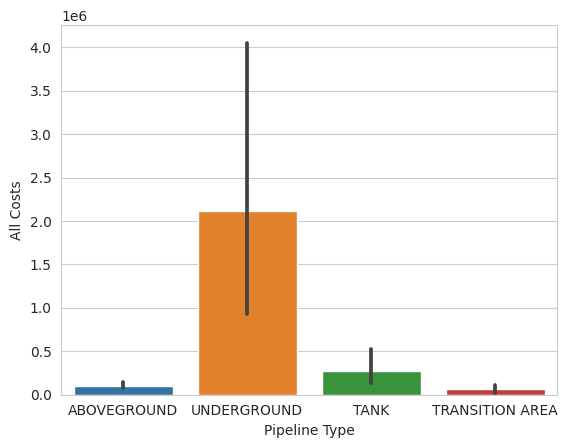

In [ ]:
oil_pipelinetype_cost = oil[['Pipeline Type','All Costs']]
sns.barplot(x='Pipeline Type',y='All Costs',data= oil_pipelinetype_cost)

In [ ]:
df2 = oil.copy()
df2['All Costs'] = df2['All Costs']/1000000.0
df2['Property Damage Costs'] = df2['Property Damage Costs']/1000000.0
df2['Lost Commodity Costs'] = df2['Lost Commodity Costs']/1000000.0
df2['Public/Private Property Damage Costs'] = df2['Public/Private Property Damage Costs']/1000000.0
df2['Emergency Response Costs'] = df2['Emergency Response Costs']/1000000.0
df2['Environmental Remediation Costs'] = df2['Environmental Remediation Costs']/1000000.0
df2['Other Costs'] = df2['Other Costs']/1000000.0

**Plotting more visualization for better understanding**

In [ ]:
headers = ['Accident Year','All Costs','Property Damage Costs',
           'Lost Commodity Costs','Public/Private Property Damage Costs',
           'Emergency Response Costs','Environmental Remediation Costs', 'Other Costs']
df_forPlots = df2[headers]
df_forPlots = df_forPlots[df_forPlots['Accident Year'] != 2017]
by_year = df_forPlots.groupby('Accident Year')

xPt = by_year.sum()['All Costs'].index.values
yAll_sum = by_year.sum()['All Costs'].values
yPro_sum = by_year.sum()['Property Damage Costs'].values
yCom_sum = by_year.sum()['Lost Commodity Costs'].values
yPri_sum = by_year.sum()['Public/Private Property Damage Costs'].values
yEme_sum = by_year.sum()['Emergency Response Costs'].values
yEnv_sum = by_year.sum()['Environmental Remediation Costs'].values

fracProp = by_year.mean()['Property Damage Costs'].values / by_year.mean()['All Costs'].values
fracComm = by_year.mean()['Lost Commodity Costs'].values / by_year.mean()['All Costs'].values
fracPriP = by_year.mean()['Public/Private Property Damage Costs'].values / by_year.mean()['All Costs'].values
fracEmer = by_year.mean()['Emergency Response Costs'].values / by_year.mean()['All Costs'].values
fracEnvi = by_year.mean()['Environmental Remediation Costs'].values / by_year.mean()['All Costs'].values

**Year-by-year plot**

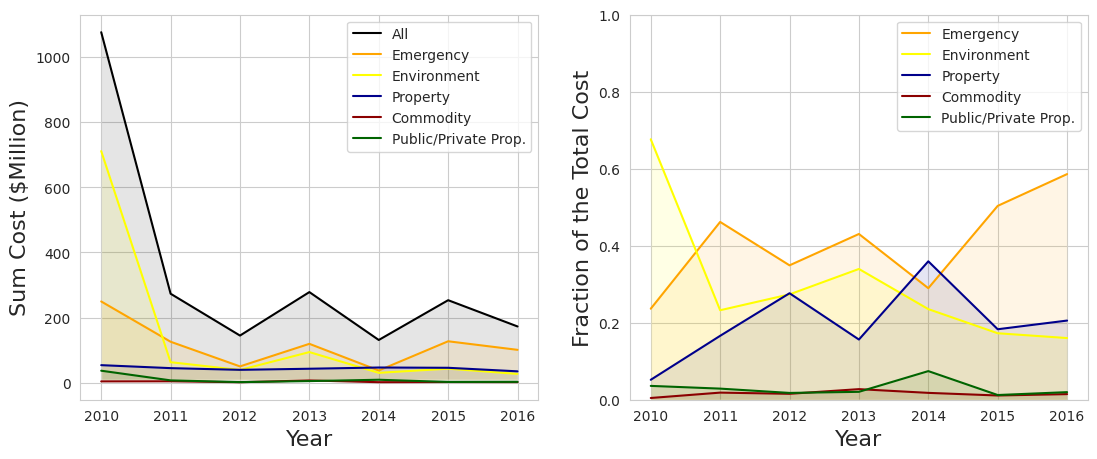

In [ ]:
f, a = plt.subplots(nrows=1, ncols=2, figsize=(13,5))

a[0].plot(xPt, yAll_sum, label="All", color='black')
a[0].plot(xPt, yEme_sum,label="Emergency", color='orange')
a[0].plot(xPt, yEnv_sum,label="Environment", color='yellow')
a[0].plot(xPt, yPro_sum,label="Property", color='darkblue')
a[0].plot(xPt, yCom_sum,label="Commodity", color='darkred')
a[0].plot(xPt, yPri_sum,label="Public/Private Prop.", color='darkgreen')
a[0].fill_between(xPt, yAll_sum, 10E0, facecolor='black', alpha=0.1)
a[0].fill_between(xPt, yPro_sum, 10E0, facecolor='darkblue', alpha=0.1)
a[0].fill_between(xPt, yCom_sum, 10E0, facecolor='darkred', alpha=0.1)
a[0].fill_between(xPt, yPri_sum, 10E0, facecolor='darkgreen', alpha=0.1)
a[0].fill_between(xPt, yEme_sum, 10E0, facecolor='orange', alpha=0.1)
a[0].fill_between(xPt, yEnv_sum, 10E0, facecolor='yellow', alpha=0.1)
a[0].get_xaxis().get_major_formatter().set_useOffset(False)
a[0].set_xlabel('Year', fontsize=16)
a[0].set_ylabel('Sum Cost ($Million)', fontsize=16)
a[0].legend()


a[1].plot(xPt, fracEmer,label="Emergency", color='orange')
a[1].plot(xPt, fracEnvi,label="Environment", color='yellow')
a[1].plot(xPt, fracProp,label="Property", color='darkblue')
a[1].plot(xPt, fracComm,label="Commodity", color='darkred')
a[1].plot(xPt, fracPriP,label="Public/Private Prop.", color='darkgreen')
a[1].fill_between(xPt, fracProp, 0, facecolor='darkblue', alpha=0.1)
a[1].fill_between(xPt, fracComm, 0, facecolor='darkred', alpha=0.1)
a[1].fill_between(xPt, fracPriP, 0, facecolor='darkgreen', alpha=0.1)
a[1].fill_between(xPt, fracEmer, 0, facecolor='orange', alpha=0.1)
a[1].fill_between(xPt, fracEnvi, 0, facecolor='yellow', alpha=0.1)
a[1].get_xaxis().get_major_formatter().set_useOffset(False)
a[1].set_xlabel('Year', fontsize=16)
a[1].set_ylabel('Fraction of the Total Cost', fontsize=16)
a[1].set_ylim([0,1])
tmp = a[1].legend()


**Most Frequent Oil Spillers**

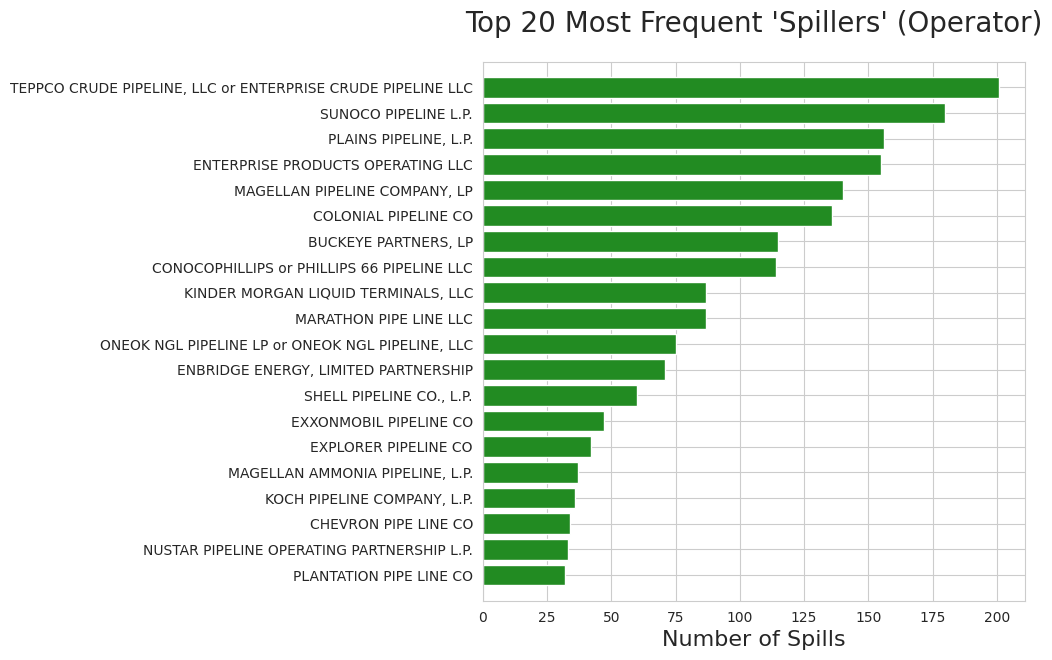

In [ ]:
import collections as col
CCC = col.Counter(oil['Operator ID'].values)
ids = [x[0] for x in CCC.most_common(20)]

hXvalue = []
hValues = []
hLabels = []
# Need to link the operator Id to the operator name, this isn't a 1-to-1 relationship
for j, i  in enumerate(ids):
    #print df['Operator Name'].loc[df['Operator ID'] == i].unique(), CCC[i]
    hXvalue.append(j+1)
    hValues.append(CCC[i])
    hLabels.append(" or ".join(oil['Operator Name'].loc[oil['Operator ID'] == i].unique()))


# MOST COMMON SPILL CAUSES
DDD = col.Counter(oil['Cause Category'].values)
ids2 = [x[0] for x in DDD.most_common(20)]

hXvalue2 = []
hValues2 = []
hLabels2 = []
for j, i  in enumerate(ids2):
    hXvalue2.append(j+1)
    hValues2.append(DDD[i])
    hLabels2.append(i)
fig = plt.figure(figsize=(7, 7))
plt.barh(hXvalue[::-1], hValues, align='center', color='forestgreen')
plt.ylim([0,len(hValues)+1])
plt.title('Top 20 Most Frequent \'Spillers\' (Operator)', fontsize=20, y=1.04)
y = plt.yticks(hXvalue[::-1], hLabels, fontsize=10)
x = plt.xlabel('Number of Spills', fontsize=16)
x2 = plt.xticks(fontsize=10)

**Most Frequent Spill Casuse**

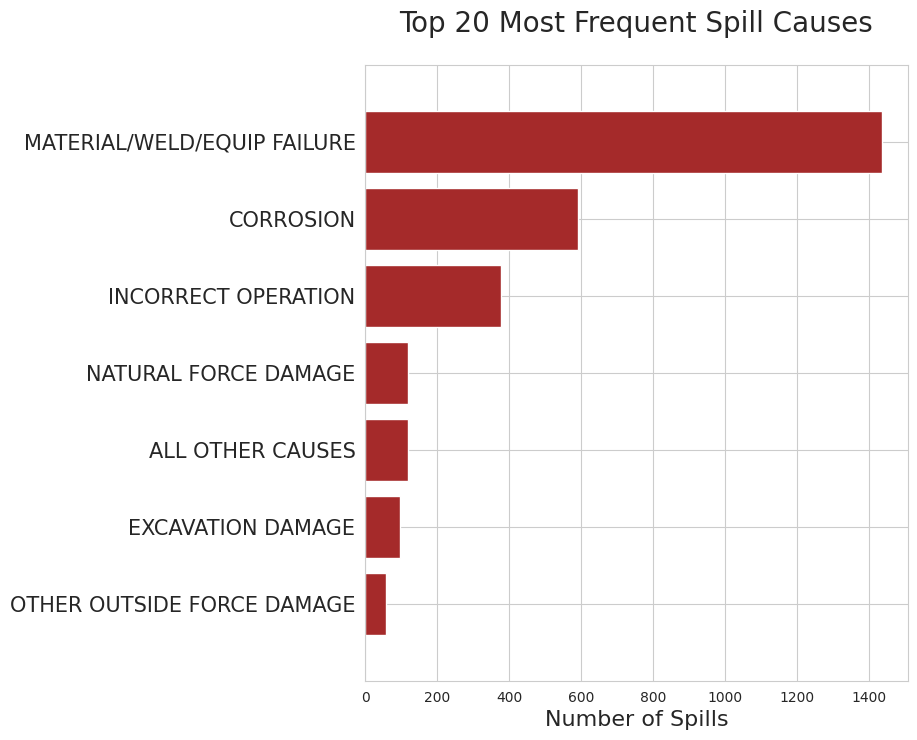

In [ ]:
fig = plt.figure(figsize=(7, 8))
plt.barh(hXvalue2[::-1], hValues2, align='center', color='brown')
plt.ylim([0,len(hValues2)+1])
plt.title('Top 20 Most Frequent Spill Causes', fontsize=20, y=1.04)
y = plt.yticks(hXvalue2[::-1], hLabels2, fontsize=15)
x = plt.xlabel('Number of Spills', fontsize=16)
x2 = plt.xticks(fontsize=10)

**Correlation between Spill cost and Spill Size**

Text(0.005, 100000000.0, 'Emergency Costs')

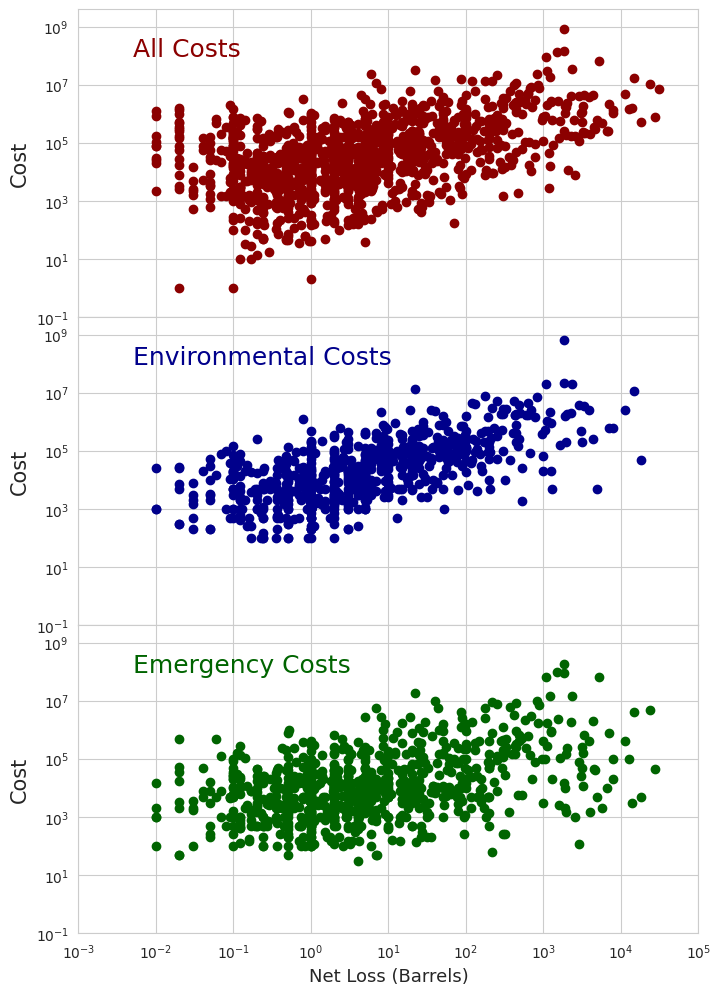

In [ ]:
f, a = plt.subplots(nrows=3, ncols=1, figsize=(8,12), sharex=True)
f.subplots_adjust(hspace=0.)

a[0].scatter(oil['Net Loss (Barrels)'].values,
              oil['All Costs'].values,
              label="All", color='darkred')
a[0].set_yscale('log')
a[0].set_ylim(0.1,4e9)
a[0].set_xscale('log')
a[0].set_xlim(0.001,100000)
a[0].set_ylabel('Cost', fontsize=15)
a[1].scatter(oil['Net Loss (Barrels)'].values,
              oil['Environmental Remediation Costs'].values,
              label="All", color='darkblue')
a[1].set_yscale('log')
a[1].set_ylim(0.1,4e9)
a[1].set_xscale('log')
a[1].set_xlim(0.001,100000)
a[1].set_ylabel('Cost', fontsize=15)
a[2].scatter(oil['Net Loss (Barrels)'].values,
              oil['Emergency Response Costs'].values,
              label="All", color='darkgreen')
a[2].set_yscale('log')
a[2].set_ylim(0.1,4e9)
a[2].set_xscale('log')
a[2].set_xlim(0.001,100000)
a[2].set_ylabel('Cost', fontsize=15)
a[2].set_xlabel('Net Loss (Barrels)', fontsize=13)
a[0].text(0.005, 1e8, "All Costs", fontsize=18, color='darkred')
a[1].text(0.005, 1e8, "Environmental Costs", fontsize=18, color='darkblue')
a[2].text(0.005, 1e8, "Emergency Costs", fontsize=18, color='darkgreen')

**Plotting the geographical map to show the coordinates of latitude and longitude of the place of oil spillage**

In [ ]:
! pip install fiona geopandas xgboost gensim folium pyLDAvis descartes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 107.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 118.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 38.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.3 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.0 which is incompatible.
tensorflow 2.12.0 

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline

In [ ]:
city = oil['Accident City'].tolist()
country = oil['Accident County'].tolist()
latitude = oil['Accident Latitude'].tolist()
longitude = oil['Accident Longitude'].tolist()

new_city = [item for item in city if not(pd.isnull(item)) == True]
new_country = [item for item in country if not(pd.isnull(item)) == True]

print('Accident City:', new_city)
print('Accident County:', new_country)
print('Accident Latitude:', latitude)
print('Accident Longitude:', longitude)


Accident City: ['MCPHERSON', 'RAYMOND', 'SULPHER', 'SUPERIOR', 'SHERMAN', 'NECHE', 'GALENA PARK', 'HULL', 'PASADENA', 'LAKE CHARLES', 'TAFT', 'CHASE', 'CUSHING', 'CUSHING', 'RUSHVILLE', 'PAWNEE', 'SORRENTO', 'GALENA PARK', 'MENAHGA', 'GOWANDA', 'CARSON', 'ELLIS', 'PRINCETON', 'AURORA', 'HARTFORD', 'TAFT', 'GREENSBURG', 'COLLINS', 'EL DORADO', 'PRINCETON', 'CUT OFF', 'PORT ARTHUR', 'DICKINSON', 'HARPER', 'MILWAUKEE', 'EL DORADO', 'LAKE ARTHUR', 'BATON ROUGE', 'LINCOLN', 'WAYNE', 'KANSAS CITY', 'LINDEN', 'LONGVIEW', 'MCCAMEY', 'BIG SPRING', 'SPOKANE', 'COUNCIL BLUFFS', 'POND CREEK', 'LONGVIEW', 'CLEARBROOK', 'HAYNE', 'SULPHUR', 'SORRENTO', 'CARROLLTON', 'KANSAS CITY', 'LONGVIEW', 'CORSICANA', 'SUPERIOR', 'MILFORD', 'COMYN', 'HOBBS', 'WHITE OAK', 'SACRAMENTO', 'CUSHING', 'METTLER', 'MOKENA', 'TEXAS CITY', 'JACKSON', 'WESTLAKE', 'CUSHING', 'BATON ROUGE', 'PHILADELPHIA', 'BORGER', 'ST PETERSBURG', 'SULPHUR', 'BOURBONNAIS', 'SALISBURY', 'CHARLOTTE COURTHOUSE', 'GOWER', 'TULSA', 'ROBERTSON', 

In [ ]:
#preparing the dataframe with longitudes and latitudes of the place where oil spillage occured
df = pd.DataFrame({
    'AccidentLatitude': [38.6707, 43.94028, 30.1824, 46.6893, 33.58266, 48.99555, 29.4305, 30.08533, 29.4305, 29.71478, 30.25989, 28.05529, 38.34519, 35.94466, 35.93749, 40.16833, 36.39836, 30.1724, 29.4305, 46.8197, 42.38229, 33.80933, 38.81386, 38.32113, 39.0081, 38.82204, 35.27901, 30.78251, 31.63251, 37.803255, 38.32113, 29.47, 29.8916, 46.851256, 37.355914, 42.9289, 37.80218, 30.0795, 30.54741, 39.8106, 41.94352, 39.13776, 40.6086, 32.4785, 31.13284, 32.22471, 47.71696, 41.21235, 36.6659, 35.48354, 32.48325, 47.68857, 37.10847, 28.10406, 30.16801, 30.17319, 39.36359, 39.13844, 32.48248, 32.06839, 46.68889, 43.29183, 32.07267, 32.652, 32.52582, 38.5997, 35.95885, 35.01937, 41.5569, 29.39972, 30.71121, 30.241, 35.93985, 30.54741, 39.91934, 28.68555, 35.68463, 27.86028, 30.15957, 41.1784, 39.46308, 37.15778, 39.64343, 36.13252, 41.184974, 35.42148, 29.2564, 38.1337, 32.06374, 38.63064, 32.5375, 35.86572, 35.76698, 39.02601, 29.90083, 32.47413, 29.99763, 36.5746, 28.279502, 47.31006, 44.000221, 38.98742, 30.70863, 41.80708, 38.88188, 42.51862, 38.47623, 33.85651, 29.7169, 29.7268, 42.45589, 37.81654, 40.6054, 29.91232, 33.735001, 36.253344, 48.39475, 32.611, 32.47042, 31.42962, 30.0119001, 33.07358, 29.34921, 29.3475, 32.48191, 40.57083, 32.56184, 40.61428, 38.1019, 40.70942, 44.62351, 32.53091, 29.71831, 63.93074, 39.800348, 30.19071, 39.12851, 32.06839, 38.72582, 29.718767, 41.844019, 29.706473, 35.93019, 34.91801, 35.467203, 29.88878, 31.98743, 35.55441, 45.672992, 28.85030001, 48.720364, 39.506925, 30.0124001, 44.67167, 30.239547, 33.59667, 29.74697, 31.65608, 42.20753, 30.05006, 40.76505, 35.94595, 35.946697, 41.123379, 29.95687, 30.94037, 43.965346, 30.124278, 40.706418, 32.53275, 40.647936, 41.31825, 37.84074, 47.32444, 28.711239, 36.00943, 33.53866, 33.956, 36.01526, 29.630833, 29.62478, 32.47831, 32.28594, 38.09072, 35.23317, 29.630232, 38.828047, 36.77451, 35.55435, 39.68524, 40.591463, 38.780525, 30.45372, 40.36468, 42.24329, 30.145766, 38.82204, 47.372103, 45.792899, 47.38361, 37.8875, 32.06839, 38.66916, 32.49783, 39.8188, 41.6234, 31.434268, 34.82512, 32.11581, 32.00836, 29.726944, 29.66904, 40.73625, 41.577697, 34.43528, 31.58929, 42.63521, 30.02609, 29.718312, 48.96572, 32.06839, 35.97916323, 37.91083, 29.847028, 29.84671, 29.825329, 42.855444, 42.46833, 29.73525, 29.54619, 33.91269, 37.08414, 36.810495, 28.617778, 46.71782754, 67.7987, 37.04441, 30.496161, 38.37239, 38.3693, 29.97496932, 41.655265, 42.56794, 37.80556, 30.0016, 29.816369, 32.71141, 42.02244, 30.43779, 39.38235, 29.920836, 32.46539, 30.1479, 47.32444, 32.7478, 29.98219, 29.98219, 32.47831, 30.11356, 42.9015, 30.0113, 33.41305, 40.52243, 40.091758, 31.06576, 32.6075, 34.37306, 29.19462, 37.644112, 33.54657, 29.4745, 29.975, 29.90801, 34.058206, 31.8768505, 34.94418, 33.31354, 41.7678, 29.85836, 37.89533, 33.7963, 34.24278, 46.93944, 33.811699, 44.77328, 36.41936, 34.24278, 37.414383, 42.5325, 31.1591, 28.9351, 32.75732, 30.06066, 32.97722, 30.5572, 40.58925, 37.4175, 29.1452, 35.119174, 46.2199, 29.84931, 34.55261, 35.383359, 41.60865, 40.57083, 33.863186, 33.38649, 31.427166, 33.25417, 43.26707, 29.85635, 40.766643, 38.94905, 33.936233, 30.81167, 32.532127, 41.51718, 39.13805, 36.1326083, 39.36139, 40.61145, 32.540604, 32.775943, 46.877218, 38.848525, 29.90087416, 35.203837, 37.742029, 36.93117, 43.72835, 42.1514, 38.34136, 37.4175, 40.5566, 41.63156, 33.407, 38.501817, 34.92544, 32.87476, 40.606837, 29.349, 30.4342, 40.55081, 33.45494, 29.76713, 33.863333, 43.05284, 38.38166, 32.00836, 41.6136, 41.410931, 35.4855, 29.717169, 43.42656, 27.5529182, 33.573889, 29.43573, 70.25666, 37.51111, 31.820486, 35.534236, 30.016667, 29.72034, 35.56572, 36.20138, 39.36139, 40.60545, 41.55455, 31.55556, 39.81694, 41.6424, 34.76231, 30.2298122, 30.16954, 29.85325, 29.3753, 30.77929, 18.44801, 39.60887, 29.885833, 39.896, 35.96788, 35.9303, 35.9375, 41.6671, 44.26055, 27.68402, 37.64416, 40.59348, 32.4813, 39.897834, 29.848528, 29.84904, 29.43573, 32.483, 35.85326, 32.5409, 31.1611, 41.7731, 34.37332, 29.98722, 39.191028, 40.59441, 40.606466, 37.3612, 36.892543, 43.29194, 47.55403, 29.847222, 32.53048, 39.75888, 35.93964, 41.7643, 47.92555, 30.7932, 39.822925, 29.4009, 30.32637, 48.24063, 35.56033, 38.36098, 34.36098, 29.854148, 37.66168, 45.79417, 44.815639, 35.94595, 42.278472, 41.307, 40.593267, 30.54741, 36.221931, 39.86822, 29.9115, 33.97, 40.62252, 29.7675, 30.3892333, 29.4388, 40.5161701, 35.2858, 38.1337, 35.95885, 40.550972, 38.792059, 42.73839, 28.00917, 32.55991, 46.68889, 31.13244, 30.354517, 39.36101, 33.78114, 31.7765, 44.5311, 40.78155, 46.41379, 42.514136, 36.38298, 32.34464, 28.560826, 39.080486, 38.939028, 33.5352, 39.193056, 33.86329, 28.3445, 32.017047, 31.50653, 42.5783333, 37.027049, 33.5124, 28.480925, 38.04121, 45.95307, 39.482631, 31.49797, 41.68148, 42.88895, 41.639016, 41.04755, 42.26259, 40.706216, 38.09973, 35.22377, 40.52243, 33.4614, 41.4145, 39.71864, 42.272024, 29.70639, 32.06456, 41.684292, 42.07471, 34.751139, 32.004805, 33.307077, 38.08131, 43.286542, 29.726944, 33.7966, 34.16078, 32.77698, 27.943, 32.77597, 32.02879, 40.4101, 32.777568, 34.27734, 40.70825, 29.781516, 30.452391, 27.959521, 32.5327, 35.953482, 31.79133, 40.59213, 33.4604, 30.042343, 40.74573, 33.6938, 30.08566, 32.9491, 45.655486, 33.936514, 44.37956, 35.87218, 38.28588, 35.95885, 29.878953, 38.78564, 31.7767, 30.11472, 41.86305, 33.179721, 35.6376, 29.238862, 27.72222, 42.053138, 35.94607, 29.43573, 31.1611, 27.97348, 37.78947, 31.13193, 39.03543, 29.7182, 27.91036, 36.029589, 30.5471, 37.05253, 33.846624, 35.296047, 33.81583, 33.83799, 41.645101, 40.550801, 39.120239, 32.02821, 34.83433167, 41.27461, 28.804167, 28.804167, 29.206868, 33.83299, 42.00461, 39.61412, 46.68889, 33.91765556, 36.33746, 40.6945, 30.055571, 29.084431, 29.887222, 40.596305, 36.9006, 37.944408, 41.55804, 38.066978, 33.86357, 37.795178, 40.111093, 32.06704, 32.1147, 37.0525, 43.54571, 32.01798, 33.756403, 35.684911, 32.303575, 32.251168, 40.590422, 35.43959, 38.38052, 29.26536, 29.878864, 34.133131, 29.43573, 30.034033, 35.93198, 48.81835, 43.860695, 42.957763, 42.959503, 29.70989, 29.72703, 33.4166975, 44.665449, 48.325724, 46.68889, 39.862222, 43.475465, 41.5569, 31.362222, 33.84735, 40.590142, 30.14105, 36.13715, 38.98759, 29.86809, 39.363277, 36.8053, 35.7042, 29.193445, 41.93805, 32.4819, 41.50506, 31.12252, 36.13158, 35.952194, 34.55261, 31.960602, 41.93805, 34.63366, 35.02529, 33.45542, 29.970953, 35.3275, 39.9923, 29.345464, 33.970039, 40.591656, 32.26812, 31.89631, 41.60720541, 37.963297, 30.355333, 47.68889, 30.239269, 35.96143, 33.86345, 46.861678, 32.599125, 44.021949, 25.964238, 29.34578, 35.94085, 41.659288, 47.68889, 40.588225, 39.711344, 30.16485, 29.724843, 29.79428, 33.22053, 31.85557, 36.18992091, 29.43573, 29.43573, 33.59872, 47.907607, 41.565497, 29.9948, 33.68092, 32.080874, 36.413056, 47.673856, 30.796962, 40.31277, 40.31277, 32.06704, 32.29488, 34.0522342, 36.06889, 36.632156, 33.6809, 28.93564, 30.2867, 39.45627, 29.893363, 31.78341, 31.78341, 29.750786, 32.63239, 39.10878, 36.773902, 44.817233, 31.9587, 38.866606, 30.158686, 30.0889, 35.2256, 34.521102, 41.17974, 33.857292, 65.31111, 33.802717, 40.58888, 40.52243, 34.553462, 39.12851, 32.02879, 38.78778, 41.56563, 30.011111, 40.29213, 33.20242, 44.642128, 32.84745, 42.854803, 39.136219, 31.15279, 42.9517, 29.84722, 31.47285, 29.97501, 41.6076, 35.951559, 33.764, 40.696043, 32.51846, 37.761233, 30.01612, 34.94212, 44.73486, 27.83146, 30.239319, 45.65804642, 30.26630836, 44.05727, 40.57729, 42.53889, 40.52243, 39.27126, 41.49806, 32.1532, 44.87601, 44.759651, 45.526048, 41.50667, 47.098889, 46.24913, 34.89185, 27.8215, 32.53242, 29.95115, 30.0889, 32.3288, 41.49188, 29.3736, 33.864289, 29.787, 32.01435, 29.759006, 41.36417, 36.12128, 40.894805, 29.72941, 40.590763, 40.523327, 30.5187, 45.010556, 40.52243, 29.274667, 29.911676, 33.007092, 47.378551, 38.82204498, 45.894167, 41.95138, 47.6895, 37.800717, 31.77654, 38.82855, 38.79106, 41.148878, 31.821442, 33.795549, 48.455641, 48.455641, 30.8568, 33.03138, 41.658008, 29.974993, 32.01426, 40.711686, 33.03138, 39.72708, 40.52243, 47.68889, 30.1408, 35.953247, 33.80197, 35.34866, 32.02821, 30.010536, 30.492551, 45.05919, 40.647936, 32.862785, 35.9382, 37.78977, 27.83125, 29.06023333, 40.352903, 35.04474, 29.52107, 34.972892, 70.15120454, 41.62672, 39.03543, 29.145153, 40.608511, 34.244372, 30.554483, 35.7688889, 29.419652, 32.40169, 30.793919, 37.579665, 38.35257318, 30.0064, 34.32044, 40.588225, 32.26812, 35.92536, 46.902916, 39.5894, 28.949612, 40.40966, 35.97916323, 44.81602, 41.395652, 32.0729, 29.71871, 40.352903, 31.790487, 43.93146, 35.4672, 33.99271, 31.43275, 35.737564, 46.68889, 35.943731, 33.795549, 31.68154, 29.747769, 37.8048, 41.286642, 35.276957, 34.00551, 31.7918, 30.008992, 37.93455, 29.859222, 28.949672, 32.87718, 33.17535, 29.145494, 28.950953, 34.1897222, 37.7958, 40.514382, 29.997663, 29.952222, 32.4813, 37.721901, 39.08605, 41.435852, 37.75877757, 37.80389, 33.247889, 29.81987246, 34.84251, 38.025394, 28.809202, 33.05365, 32.0729, 30.79796, 30.80147, 40.513554, 38.09496, 30.1571, 43.297089, 30.90944, 30.15683, 32.779328, 41.6872222, 29.8964, 40.52243, 40.6246, 28.9598, 35.95885, 46.81973992, 37.81841, 29.51419, 29.97504, 43.895611, 38.834923, 31.19309, 37.070361, 30.1457, 35.9361111, 46.41428, 32.78111, 29.3786, 27.826919, 44.069, 30.16414, 32.655, 33.85596, 39.12889, 39.8955, 36.17115, 32.28877, 29.764311, 38.851604, 27.8608333, 43.8516667, 39.060075, 29.911491, 43.8516667, 41.68140797, 46.49535, 37.495186, 29.97583, 35.059321, 29.1049, 29.955034, 42.282925, 32.01493, 42.94222, 40.57704, 35.1544444, 29.485, 42.72143, 40.52243, 29.72536, 40.608277, 28.949889, 30.1150416, 37.6159, 30.056, 32.1057904, 29.34525, 31.13575, 30.145154, 33.33278, 32.532, 33.90593, 32.5327, 29.79449, 35.3599366, 31.76885, 33.8000022, 41.609953, 39.323679, 29.348547, 31.77393, 32.089083, 33.86206, 42.222753, 30.6688, 35.05097, 29.726669, 38.835046, 35.939625, 40.136819, 29.96887, 35.94109, 40.51608, 33.84494, 30.006667, 29.422222, 40.401, 37.817, 33.841119, 30.145154, 35.944728, 33.138683, 40.52243, 38.12745, 45.89504, 41.644119, 28.60758, 42.11445, 32.23587, 35.94805, 35.276957, 28.618056, 40.608272, 41.73889472, 36.64234919, 33.902032, 41.684108, 47.634874, 29.11242, 32.08014, 30.28649, 48.24275, 47.0988, 30.160197, 32.06432, 33.767016, 29.951987, 43.2930556, 41.55556, 34.20969, 31.01183, 40.621988, 41.68411, 42.225925, 30.84377614, 35.019374, 38.585632, 39.15386, 36.0191, 29.87283, 29.71816, 28.894955, 30.909265, 32.113857, 40.6084, 30.15735228, 40.505602, 38.338614, 29.712258, 29.9771376, 35.59243, 37.66279, 39.8458, 40.97604, 37.05446, 30.049461, 33.59202, 33.86379, 30.479042, 38.377992, 48.284494, 42.2748, 29.718947, 40.3375, 32.833, 32.87476, 44.815919, 30.066112, 32.874247, 37.44967, 42.131311, 37.045196, 30.54741, 36.07076, 45.143056, 33.698451, 33.87367, 40.3196, 37.061114, 35.95885, 30.94062, 38.569474, 33.42163, 35.94607, 41.41355, 32.70298, 31.531786, 30.066112, 40.513477, 35.940158, 35.097214, 32.87476, 29.792012, 33.24455, 38.7919, 33.251978, 35.726944, 38.205021, 31.41808, 38.09347, 32.48128, 45.479889, 45.89341, 34.245072, 36.03403, 38.91689, 32.54948, 34.07083, 48.27904, 40.52243, 43.6067, 30.03188, 40.585479, 37.6159, 32.813, 42.06139, 32.86057, 38.73302, 42.87907, 38.923554, 32.70141, 40.52243, 29.708617, 31.931914, 29.9807, 31.96551, 29.8279, 32.56273, 30.92773, 41.6877778, 30.92696, 40.585479, 32.61094, 33.83017, 40.002304, 45.722409, 37.188347, 29.69373658, 29.62333683, 30.1458, 39.17837, 37.84552, 29.37889, 44.460839, 29.8538, 29.253809, 33.855711, 40.585479, 29.9121, 35.285, 31.776632, 30.087494, 29.461595, 40.395534, 35.95778, 41.510158, 39.544, 30.93182, 29.9877906, 35.94072, 33.863481, 35.84613, 38.34024, 29.763813, 36.13137, 32.088227, 41.322508, 29.708617, 30.10556, 32.532145, 37.9702, 29.52032, 33.24043, 32.5343, 30.02767, 29.633617, 43.1407, 32.02363, 41.419421, 32.0711, 29.87727, 41.640712, 37.46699, 28.8239, 29.716111, 34.96406, 29.926686, 31.525701, 47.685115, 35.097314, 39.328029, 41.752979, 37.052548, 30.71263, 29.81987246, 31.13665, 32.772073, 32.0711, 41.752979, 31.784903, 33.736385, 30.2304266, 41.255807, 40.52243, 29.706587, 38.58556, 32.5007778, 39.816597, 41.2885, 33.28411, 38.38154, 28.54022, 29.74772, 30.18348, 40.711466, 36.54755, 35.94336, 40.59063, 39.22226, 31.52811, 38.82204498, 32.0711, 40.519728, 48.21111, 40.291729, 32.00836, 32.61009, 36.57243, 42.183809, 48.323422, 40.59063, 29.708617, 47.90556, 34.55306, 36.18085, 36.18977222, 33.826786, 38.869483, 34.23884, 47.882222, 40.31491, 29.82961, 31.7768, 39.853611, 28.95081, 41.274678, 29.44778, 32.9392, 43.080915, 33.5890316, 29.90949, 41.67288, 29.31589, 29.763824, 36.135178, 38.95973, 41.90877, 35.95885, 29.34551, 34.31371, 30.0038889, 39.8411, 36.01167, 34.092292, 29.73069, 46.6178, 40.52243, 29.473497, 39.36863, 39.915961, 40.52243, 39.74636, 28.41922, 40.16005, 36.947219, 43.992624, 41.55849, 28.61171, 38.34021, 45.78611, 28.920722, 40.94267, 30.83705, 32.49781, 35.96576, 31.93856, 67.7987, 35.063508, 40.52243, 33.85602, 40.676504, 32.38719, 32.02064, 29.97523, 39.673538, 34.093675, 33.914572, 33.863, 30.0095, 32.848, 36.01663, 40.52243, 29.10788, 28.3563889, 42.80667, 42.79375, 45.250322, 28.605919, 29.36555, 47.7826, 29.90087416, 38.3362, 35.32395, 37.80249, 41.61955, 40.52243, 37.226483, 48.331143, 36.07123064, 28.63112, 30.060572, 33.914949, 38.19639, 47.32444, 33.139747, 48.365352, 29.04718, 42.9916667, 45.883706, 36.927591, 34.421537, 32.10503, 48.524251, 36.07123064, 35.94754, 32.7261111, 29.04464, 29.765054, 30.155076, 43.78507, 40.52243, 35.431862, 41.51616, 39.025586, 33.806255, 45.698036, 41.67284, 42.1043, 38.003663, 30.02448, 32.483217, 40.57741, 41.697667, 30.20382, 39.70808, 40.605222, 47.934931, 39.789126, 29.358902, 29.950028, 42.854755, 41.8458333, 36.346272, 39.85162, 42.8842, 29.705972, 40.52243, 30.04236, 37.052386, 37.79193, 39.3271159, 32.39482, 32.531983, 40.203611, 28.488488, 29.716471, 34.874565, 35.55167, 33.949629, 29.146389, 35.936195, 33.8630556, 32.359487, 40.6082833, 36.086068, 36.77414, 40.351944, 43.58698, 42.81144, 39.02942, 31.215, 40.519942, 29.72979, 44.788806, 44.7937698, 37.79167, 35.265278, 28.949448, 31.655975, 30.84377614, 32.02343, 32.28981, 34.314349, 29.854022, 31.97435, 33.86657, 33.769722, 31.93103, 33.03568558, 43.0456, 29.717115, 32.782062, 31.76976, 36.4302, 28.5088889, 32.36876, 29.89936, 35.3496, 29.92317489, 39.70736769, 40.588583, 48.304045, 41.61566, 35.94066, 48.325686, 36.775556, 29.81987246, 30.13945, 33.22973, 46.69, 35.317952, 40.52243, 31.15903, 32.842833, 32.108042, 35.69559, 33.26013184, 39.395483, 29.36586, 36.67346274, 32.079424, 32.650565, 36.7889, 40.039849, 33.828281, 34.2391, 27.831131, 42.917984, 29.787397, 27.839803, 38.83618, 37.12022, 35.9863, 38.7893921, 35.597478, 29.75023, 38.814911, 33.31601, 41.5652, 36.649239, 40.519999, 36.905274, 39.277928, 40.80216, 36.4309, 39.03517, 35.95778, 32.650552, 29.787397, 35.69179, 35.6905, 29.75023, 38.829252, 29.68112, 41.55694, 29.85731, 35.5291888, 34.394601, 41.609732, 31.62733, 29.22007944, 32.70276, 40.609013, 36.07076, 30.54601111, 34.70203, 41.322508, 40.47829444, 35.96984, 40.697527, 38.339543, 30.54774, 37.321081, 44.77084, 31.948696, 33.800211, 32.50059, 39.7859444, 41.529826, 37.35595, 29.750895, 38.344339, 38.341141, 40.52243, 35.8377778, 33.56399, 47.32556, 39.36293, 32.89621, 37.357891, 32.04704, 31.81845, 28.949448, 38.344339, 32.06417, 34.206615, 36.48798, 41.626855, 37.205338, 29.374592, 32.76118, 40.519254, 43.114444, 32.9942, 41.612919, 30.90931, 40.609319, 41.51487, 30.75774, 30.711259, 43.51946392, 29.819151, 36.6093, 32.83256, 41.60766736, 41.421858, 47.96935, 42.53934, 38.776587, 32.5374, 37.643839, 38.88144, 35.265278, 40.70825, 41.616693, 21.31668, 32.519797, 38.863322, 31.8063, 47.78822, 34.044058, 36.00758, 41.806608, 30.71051, 32.53024, 30.1291, 32.48252, 34.55747, 35.93784934, 37.462217, 32.44166, 41.52278, 34.55773, 35.950352, 38.501433, 35.5291888, 32.0711, 30.390281, 30.383529, 43.14017, 41.507105, 47.30177, 40.697102, 47.524128, 32.081667, 29.97101, 41.311708, 48.112149, 41.126883, 35.94603, 35.945288, 41.626461, 33.97676, 28.4622222, 48.39696, 41.14364, 41.14364, 32.072932, 37.8681, 31.788398, 38.339275, 43.016283, 31.78542, 33.787864, 39.252793, 33.616375, 33.91486, 32.874236, 31.50897, 34.216537, 47.921839, 48.720364, 32.61263, 33.7161833, 27.83668, 36.03385, 32.47599, 31.636831, 43.94972, 37.972548, 32.07175, 34.87656, 28.91382, 42.024045, 29.34525, 29.91156, 29.935, 33.936574, 38.34044, 28.422635, 36.77616, 31.6256, 38.581933, 42.870358, 36.03385, 45.152093, 29.466936, 30.71133, 45.143056, 40.36474, 41.41579, 37.66399, 32.07254, 31.718902, 35.93784934, 41.831164, 32.080668, 31.85330114, 28.37, 41.621205, 47.32556, 30.010811, 32.4836, 30.170532, 29.9006722, 31.718902, 30.83709, 35.7391, 30.71133, 41.6076, 32.4982, 32.97035, 43.3831, 29.717371, 29.34525, 35.86561, 38.680985, 41.1274, 41.1274, 30.0751806, 40.52243, 30.0250818, 29.4313, 35.46577, 32.02363, 36.58261, 32.019351, 31.1158, 40.52243, 32.02363, 32.960694, 32.794161, 40.29832, 39.369394, 32.75619, 29.71927, 33.03568558, 28.260372, 34.481971, 31.819742, 34.478859, 36.64234919, 34.146191, 39.13839, 30.47832, 43.37233, 31.4396, 41.686997, 29.906433, 29.76673, 33.806917, 31.968284, 35.28036, 32.017924, 34.94194, 29.52225, 30.0058083, 36.07076, 38.617704, 30.01177, 44.85338, 30.0065888, 37.7766173, 37.7766173, 35.444988, 37.139844, 26.650465, 47.582395, 38.50252, 38.26485, 43.787975, 31.64875, 29.69581, 39.12071, 38.003663, 38.045747, 31.553051, 35.947714, 34.0577675, 35.719298, 38.061436, 42.05679, 38.792939, 30.71133, 44.803407, 29.705972, 35.983, 36.38322, 31.66159, 33.803335, 35.231666, 40.52243, 40.58547, 41.410372, 32.53193, 36.55711482, 41.60766736, 32.650336, 41.126883, 32.53151, 32.86467, 47.458331, 40.34117, 29.97507, 37.80225, 27.87527711, 40.831354, 33.86343, 29.991106, 39.96675, 29.976335, 39.846349, 30.737681, 29.752401, 39.04758, 32.652052, 32.650231, 33.7697415, 29.765783, 36.472798, 41.93695, 30.01177, 32.02424, 47.97958, 35.97916323, 40.52243, 28.422698, 41.890476, 31.81685, 38.332983, 47.68889, 38.77706, 42.557406, 37.1647, 29.119939, 46.683889, 27.80859, 29.99447, 40.609186, 29.79114, 40.697155, 33.286639, 35.943703, 30.30467, 36.773611, 28.69666, 43.38106666, 28.949448, 35.94745, 37.67502, 29.34525, 70.261265, 40.563565, 40.654111, 40.52243, 32.081519, 33.923171, 45.15209388, 29.25694, 40.58061, 40.52243, 37.08543, 35.347873, 28.94921, 42.225543, 42.308627, 31.8015, 47.68412, 29.760156, 28.928655, 37.08136, 38.003663, 35.435057, 29.105684, 37.976654, 35.13221, 32.775858, 35.265278, 29.56687, 41.62263, 45.206089, 35.134147, 32.56757, 33.29701, 48.2351, 40.21421, 37.12897, 40.612444, 30.528877, 34.5530703, 41.55556, 33.29701, 27.783128, 35.94373, 43.78306944, 27.770422, 29.72979, 29.08966, 31.950527, 47.12312, 30.19156, 37.69212, 43.787925, 41.782605, 34.87656, 30.0503, 32.02424, 29.066379, 32.652787, 43.78774166, 40.52243, 30.18148, 38.88162, 31.656494, 30.05012, 43.31996, 30.718259, 37.14269, 30.16968, 36.472798, 32.75828, 39.784839, 35.982628, 36.04031, 41.51556, 33.057483, 37.86364, 32.11457, 41.63611, 28.33034, 41.642669, 47.52353, 48.455641, 33.806106, 35.276957, 32.02424, 30.878502, 34.48407, 35.26177777, 28.422698, 36.48794, 40.701149, 29.066613, 35.936666, 32.53403, 36.41801, 40.536111, 46.38995, 40.697537, 36.487768, 35.97916323, 29.760156, 32.99344, 42.23326, 34.462837, 44.94151, 46.69354, 41.01816, 29.717845, 31.1158, 29.76621, 45.97528, 32.15603, 34.544428, 32.000452, 46.370782, 38.003663, 35.646475, 40.697537, 33.85623, 34.545017, 28.526987, 41.644934, 43.66693333, 40.162536, 29.579031, 41.643229, 42.851147, 47.303798, 32.782428, 39.84541, 35.92612, 30.016724, 40.262706, 39.6854, 40.52243, 29.615889, 27.79952, 32.011423, 33.287449, 28.525786, 40.52243, 35.940253, 29.069927, 28.949113, 40.70825, 35.95886, 28.885881, 37.940135, 46.6885, 40.162536, 29.98266, 34.816479, 45.698007, 34.001474, 31.899645, 29.310878, 47.03163, 48.014962, 30.01177, 34.183191, 29.617889, 29.470028, 39.849005, 35.31111, 35.936677, 46.68904, 21.31774, 29.952065, 31.136282, 46.39053, 30.566736, 29.419868, 40.366817, 30.548063, 29.72979, 36.232606, 40.6017, 41.511142, 30.71105, 32.52944, 33.947489, 41.51458, 31.899645, 39.1393, 47.325278, 43.791797, 35.73235, 36.81045, 40.70945, 29.7177027, 32.465709, 39.763568, 41.090482, 32.023108, 40.262706, 38.1021533, 32.16315, 35.01937, 40.535033, 38.17264002, 29.858881, 35.936355, 32.08076, 35.948453, 29.991413, 43.791797, 38.845635, 32.01202, 31.88918, 46.370782, 30.71116, 35.93444, 31.43284, 32.757835, 39.84512, 40.608328, 46.688674, 32.407275, 30.18156, 39.89486, 40.136819, 33.734846, 34.84676, 32.018203, 29.646875, 35.47321, 46.359919, 47.582544, 32.475, 41.299079, 37.6754, 42.53632, 38.622839, 29.911449, 31.54706, 31.54706, 41.828677, 34.12899, 41.255797, 35.48374, 42.226368, 47.689461, 36.0146585, 30.315859, 41.532684, 41.508897, 29.7632, 30.006233, 31.648653, 31.648653, 40.944856, 35.986205, 31.436508, 40.609164, 43.791797, 35.551979, 29.9912, 39.84515, 35.449592, 29.71897, 28.10406, 39.37571, 36.774347, 35.500176, 34.333794, 29.79064, 38.6092, 29.747986, 28.4601, 29.6218722, 29.610094, 29.705369, 38.264829, 39.94024, 29.862472, 34.753426, 39.230426, 32.062707, 36.64234919, 70.257147, 29.57863, 35.019746, 30.16, 32.0079, 40.318604, 29.748201, 37.50301661, 42.864441, 33.139575, 47.6899, 31.8029, 37.761305, 29.79733, 35.945098, 37.202167, 36.0724, 32.99376, 38.793803, 35.97974, 39.305031, 38.264304, 39.86216, 29.748058, 29.214284, 44.66547, 37.8041, 36.715463, 36.827669, 29.88604163, 29.193322, 30.05777, 29.748169, 33.91446, 29.74799, 33.923263, 32.0711, 27.80113016, 31.77339, 33.91446, 40.535833, 38.792939, 29.348769, 43.189245, 33.719236, 34.462434, 31.432815, 28.40632, 32.023877, 38.789242, 32.010188, 38.780153, 37.721661, 31.899768, 29.79181, 30.44471, 32.0711, 31.7316, 63.42546, 32.08164, 31.15918, 30.386817, 32.52944, 35.466951, 33.598881, 34.882052, 37.202167, 31.8526, 29.79477, 32.524731, 31.84825, 29.84692774, 36.64234919, 43.2180944, 32.088721, 43.861789, 40.589, 41.62247, 42.957732, 29.926983, 40.943291, 32.81384, 28.57446, 29.1425929, 43.50343, 31.77691, 29.70687777, 29.706862, 43.666603, 40.57667, 38.215783, 32.07175, 45.238011, 39.1402, 29.46867, 35.5314135, 41.800416, 37.68779, 47.805537, 37.66330708, 30.47386943, 29.72979, 32.49804, 32.08342, 43.4625, 38.832199, 36.011954, 40.52243, 28.0684416, 43.6666, 38.28366, 29.94075, 32.71949, 39.411914, 31.76285, 42.864441, 34.81979, 29.9944083, 42.133334, 34.89285, 41.67284, 31.1931, 33.804707, 46.689722, 32.603333, 29.71897, 29.9774, 39.846349, 47.1375, 37.057847, 40.279346, 36.49701, 40.804771, 41.51769, 29.974782, 36.56083, 32.3006, 31.504092, 29.8441496, 32.989666, 30.528648, 28.510104, 40.52243, 27.8144306, 43.9567944, 40.45772, 38.938778, 31.136905, 29.422303, 35.298901, 29.952028, 39.173564, 35.483852, 46.6869, 30.00458, 28.58189, 43.788561, 29.441693, 32.907579, 41.40817, 36.07101, 32.285819, 30.08493, 39.32604, 43.635, 43.788581, 42.849051, 36.800991, 45.56545, 29.845934, 29.747453, 32.54213, 35.93784934, 29.72979, 34.5401306, 32.0711, 28.950662, 28.059821, 39.587875, 40.708665, 42.917984, 42.116313, 30.015334, 29.74789, 40.041721, 40.010475, 23.336784, 29.72536, 37.80348, 41.69229, 32.0126, 41.805792, 28.059862, 33.771038, 37.72575, 29.72536, 35.01673757, 29.74863, 34.238914, 32.47696, 38.82684, 41.619586, 32.49804, 42.115822, 34.0599, 31.42565, 32.43048, 29.71897, 31.13735, 27.9469444, 36.735435, 35.10335, 43.842033, 34.99659, 39.786953, 35.535471, 32.53198, 29.99103, 29.91125, 35.276957, 29.978557, 41.056079, 43.78913, 40.262939, 31.8198, 30.294432, 43.788025, 47.09855, 47.732308, 50.839319, 31.80148, 31.15885, 40.069353, 30.61843, 40.523327, 40.523327, 34.105033, 29.7525, 39.59606, 31.54937, 30.164856, 29.73667, 30.713929, 40.6972222, 29.345095, 35.539578, 32.021937, 29.74734, 28.43916, 32.511567, 30.145766, 28.951204, 31.76762, 30.01172, 32.021211, 30.07415, 32.847106, 35.95902, 43.87591331, 30.07313, 43.72077, 43.94200833, 31.9525, 32.9689722, 33.856638, 43.67297971, 29.93538, 29.878747, 36.605085, 40.574722, 45.569231, 41.437931, 37.75134722, 36.274497, 28.948749, 36.54928, 29.86, 29.345358, 41.39281106, 41.38284113, 47.261205, 44.73368, 29.605714, 29.526883, 31.77691, 32.412292, 41.34767937, 44.77085, 29.1514, 30.030029, 37.6633, 29.245664, 29.75079, 33.34157, 32.49804, 36.79693, 38.13059, 36.07129, 28.3448, 29.99604, 35.139732, 32.210556, 39.995669, 35.95201, 29.912017, 31.925091, 32.368825, 34.263642, 35.0614452, 32.65151, 32.53021, 29.747625, 38.0251564, 34.472502, 32.429722, 35.768817, 29.38357, 41.56348, 28.16015, 33.424148, 29.991266, 33.098846, 35.849254, 41.78788, 31.635562, 35.94155, 32.533257, 30.92979, 39.0355, 38.37783053, 36.13064, 40.548003, 29.366003, 32.53707, 32.650659, 35.94498, 37.058121, 41.6514111, 34.998458, 40.661111, 35.225037, 47.86055, 39.8653, 38.623253, 34.217554, 42.024238, 29.72536, 32.431944, 33.28207, 30.008867, 30.6337, 35.719298, 39.025364, 30.958681, 36.06684, 47.80327, 30.010784, 36.162774, 42.12294, 30.54775, 41.5543361, 33.28139, 70.10762, 46.68329, 32.07056, 40.70498, 31.136868, 43.832639, 33.764961, 30.008867, 38.55560816, 39.484724, 30.01372, 34.32184, 32.063649, 30.942414, 41.11988, 33.40752, 35.94596, 32.07073, 40.759869, 31.870006, 43.54566, 37.680384, 39.632574, 35.938355, 29.7961139, 40.59064, 40.61154, 35.940183, 34.2021, 40.66506, 37.471, 39.846715, 40.4840972, 30.26667, 40.6581344, 40.65728842, 37.680384, 41.258087, 33.77596, 33.975062, 30.013719, 31.79747, 40.620667, 32.18726, 29.845934, 35.529177, 31.8029, 40.657443, 41.187143, 35.9585, 29.977871, 47.68973, 41.414332, 29.701113, 32.70464, 48.85108984, 33.787393, 42.20813, 46.9803, 31.166, 38.004227, 30.004722, 40.265185, 36.4740589, 42.20813, 42.53743, 35.95837, 42.22588, 28.510104, 30.26632292, 43.240356, 38.852094, 40.523327, 31.771673, 36.765308, 29.8567, 29.317764, 28.84642, 37.679044, 28.951037, 33.6594, 38.27373, 34.723949, 30.0039, 32.0757, 29.368056, 66.812823, 32.756261, 32.21265, 33.404778, 32.49829, 30.318509, 27.8125, 30.056628, 40.657792, 38.093693, 32.020434, 31.169097, 36.13218, 38.008562, 30.684, 32.090307, 33.758661, 40.203877, 37.94181, 37.94261, 47.0966335, 48.888796, 41.56244, 37.64292, 29.747375, 39.846972, 33.96455, 30.0166509, 40.650953, 29.715674, 29.36557, 27.829677, 29.7474, 40.60614, 32.019332, 37.72926, 29.916355, 28.949425, 36.8480438, 30.314425, 47.7606333, 30.30867, 33.4188, 35.951482, 40.480804, 31.155589, 39.844773, 40.58513, 33.80313, 35.439682, 41.2289, 29.79734, 31.852417, 41.801632, 29.72056, 29.72979, 42.352666, 32.15284, 29.614404, 32.08145, 40.770458, 39.06405, 30.72194, 35.2482, 48.7134237, 29.720014, 33.734846, 29.80955, 28.84754, 28.46343, 33.863326, 30.671323, 28.524255, 31.651352, 47.4593167, 29.623347, 35.938719, 29.856513, 34.283001, 29.88794, 39.772846, 30.042394, 39.484724, 30.542863, 31.769437, 30.01173, 31.944422, 33.80808, 37.586723, 28.29088, 33.034328, 39.67439, 31.83244, 40.20069, 30.0142962, 32.008424, 29.74787, 29.857787, 28.7692347, 32.209977, 33.289744, 41.606561, 32.06899, 29.766845, 35.964394, 36.13824, 32.01921, 21.30438, 38.78777, 33.76233, 33.863, 30.592658, 32.54426, 29.84136111, 39.67171, 29.758902, 35.054, 29.69438, 45.77906, 31.6777, 30.483056, 32.06854, 31.434858, 32.529914, 32.533014, 40.7076, 31.79952, 33.347755, 29.70158, 29.631459, 33.77754, 29.337541, 30.713929, 32.847106, 30.17253, 30.4446, 29.90848, 35.435228, 45.565381, 33.93594, 29.90848, 32.577172, 29.857514, 40.456096, 33.34219, 34.059928, 30.549182, 45.794368, 40.650639, 34.9175, 33.538716, 32.016023, 35.940151, 29.79637, 31.647774, 32.481377, 29.72536, 44.15348, 28.408293, 36.774166, 29.089664, 29.3191, 32.01425, 29.72979, 31.821045, 33.569382, 40.52275, 30.14044, 32.021534, 33.236374, 32.45279, 29.21194, 33.05193, 47.91906322, 35.74395, 27.8189044, 35.989585, 33.85545, 30.84377614, 40.803479, 30.61829, 36.202923, 36.29392, 41.675883, 31.13488, 29.013562, 33.806372, 30.84377614, 41.10621, 35.96953, 31.651389, 29.79556, 40.608154, 31.63511, 37.21353203, 27.832444, 31.219899, 29.74804, 30.713929, 31.80071, 29.84893, 30.713929, 29.8261, 39.846972, 42.308506, 40.858546, 37.817162, 43.78813056, 30.50214, 33.805501, 38.090565, 41.90199, 40.69436, 27.815402, 31.9810444, 47.324386, 41.35429, 35.940287, 38.62313, 38.36818, 40.630937, 32.06784, 39.04705, 29.994064, 33.204379, 29.286841, 31.70798, 30.484345, 29.74462, 47.089551, 42.887382, 40.547339, 31.137224, 29.745503, 29.79545, 34.091, 40.4329, 29.72536, 38.352573, 40.689287, 37.745816, 34.059928, 38.340005, 32.665279, 40.64995921, 44.378889, 27.829994, 32.78448, 32.02031, 33.007445, 28.558649, 34.6428, 39.40797563, 30.713929, 29.91122222, 29.47097, 32.473589, 33.885958, 43.78846666, 38.827249, 47.104525, 29.78732, 33.619833, 29.821878, 29.074975, 32.8076, 29.79489, 28.8559, 29.841234, 38.274267, 31.91401, 33.155227, 40.695592, 40.59064, 31.95023, 31.36115, 36.06382, 32.933, 36.06382, 40.291648, 39.414038, 29.614125, 33.655692, 32.8618, 39.517036, 30.332597, 35.565292, 40.631074, 29.30541],

    'AccidentLongitude': [-97.78123, -70.49336, -93.3524, -92.0612, -96.64881, -97.52554, -95.1201, -94.3805, -95.1201, -95.17611, -93.20991, -97.32797, -98.31356, -96.75427, -96.74417, -90.56593, -96.74622, -90.782, -95.1201, -95.1489, -78.91763, -118.25413, -99.42139, -87.34782, -104.01317, -90.07892, -119.31192, -90.75851, -89.52266, -96.873398, -87.34782, -90.25444, -93.9897, -102.770368, -98.206945, -87.8884, -96.90935, -92.7465, -90.16677, -86.3342, -88.23353, -94.5968, -74.2399, -94.8679, -101.18974, -101.4044, -117.35583, -95.8301, -97.8846, -80.7357, -94.83034, -95.41732, -100.80037, -90.79238, -93.34001, -90.78774, -93.45965, -94.60013, -94.8391, -96.47081, -92.05972, -95.15157, -98.46948, -103.1393, -94.86381, -121.4483, -96.75655, -119.06305, -87.8861, -94.96417, -91.28349, -93.27546, -96.75629, -90.16677, -75.20447, -91.04555, -101.35898, -82.59958, -93.33989, -87.8504, -92.87136, -78.835, -94.61827, -96.02906, -110.410612, -96.14583, -89.1883, -85.5012, -97.81895, -93.39656, -100.8377, -97.62111, -84.36458, -85.85146, -94.00556, -94.7185, -94.07668, -90.1886, -97.29544, -93.73207, -93.782668, -97.4042, -91.27566, -83.60071, -94.74432, -114.27034, -97.72254, -84.62941, -95.2364, -95.141, -95.32798, -97.02048, -74.2383, -94.01006, -118.27167, -115.045311, -102.9138, -103.0763, -102.46394, -102.380665, -90.8508001, -98.58654, -94.93901, -94.94167, -94.83511, -74.25333, -98.350678, -74.21755, -98.856419, -81.36428, -97.92161, -100.83715, -95.18038, -145.76661, -104.949162, -91.18293, -94.60705, -96.4708, -99.73018, -95.179554, -85.741131, -95.2338293, -96.74132, -81.87401, -119.703991, -94.84975, -102.63968, -97.10413, -94.593917, -97.00220001, -101.20851, -88.065491, -90.4019001, -90.24833, -93.277717, -81.95333, -95.12399, -94.84362, -104.51014, -94.07014, -111.82493, -96.75007, -96.748707, -104.783855, -90.71667, -94.40322, -97.694305, -90.768367, -84.113285, -100.82947, -88.340732, -95.93717, -98.41963, -93.76306, -89.437681, -96.55946, -82.53516, -117.884167, -96.75729, -95.119722, -95.09823, -94.86801, -94.500617, -77.44581, -97.60874, -95.058734, -90.085713, -97.75519, -97.10423, -87.236533, -74.219176, -121.246797, -94.97393, -96.65431, -84.97251, -94.404044, -90.07892, -94.57539, -108.474178, -94.63389, -97.90877, -96.47081, -104.70138, -98.63633, -75.42217, -83.4878, -102.440189, -97.18992, -102.29321, -102.0054, -95.203333, -95.05733, -73.94435, -87.49049, -97.98185, -95.47697, -97.3371, -90.85108, -95.180385, -101.65116, -96.47081, -96.00824525, -92.37944, -94.897099, -94.9057, -94.922859, -106.246861, -74.3515, -95.02365, -95.213783, -98.43935, -101.32146, -97.831946, -92.068889, -105.4412995, -149.8164, -97.01768, -91.560667, -97.80143, -97.83197, -94.0572917, -88.076523, -84.10547, -96.915, -90.8521, -95.18092, -99.81866, -91.00488, -95.62383, -87.86195, -94.020288, -103.57639, -94.4001, -93.76306, -98.9129, -94.06028, -94.06028, -94.868, -92.254, -82.5101, -94.057133, -102.44337, -74.25384, -74.738542, -103.17361, -98.1, -97.51083, -96.98528, -88.877277, -96.36906, -95.1642, -94.056, -94.01201, -117.763553, -102.4564661, -97.47736, -97.86774, -87.82972, -94.97929, -97.88435, -118.2347, -97.49972, -92.93861, -118.180656, -93.35844, -97.84852, -97.49972, -99.320819, -95.1332, -94.6759, -95.3198, -102.90678, -93.55077, -87.65444, -95.5842, -74.21709, -100.7953, -95.68005, -119.378251, -109.437, -94.89759, -82.48781, -119.742552, -92.13573, -74.25333, -118.163396, -100.01332, -102.37033, -92.61944, -83.25139, -94.90781, -111.827358, -89.75185, -98.496906, -94.76787, -100.842157, -92.00372, -94.6025, -96.029061, -77.03778, -74.23725, -95.701173, -102.959437, -96.879506, -90.084617, -94.00565624, -98.06593, -99.217775, -95.90781, -94.73, -83.163, -97.66619, -100.7953, -93.93892, -88.04958, -102.448, -90.589072, -81.87765, -91.05339, -74.219917, -94.939333, -92.9503, -97.59588, -96.35925, -95.156254, -118.163889, -93.6389, -97.819444, -102.0054, -88.0536, -88.345016, -100.9402, -95.179264, -104.91426, -97.9228261, -97.873056, -95.121835, -148.6203, -77.42333, -106.210326, -98.097395, -94.052778, -95.10635, -96.44923, -99.89379, -77.03778, -74.25835, -87.88425, -90.3954, -75.20028, -87.4744, -97.44047, -100.646116, -93.33639, -94.89837, -89.3561, -96.06167, -66.07476, -94.3214, -95.410833, -75.3586, -90.85025, -96.7514, -96.74833, -86.0209, -93.30194, -97.83324, -88.87876, -74.210174, -102.8589, -75.262507, -94.905557, -94.90535, -95.121835, -94.8388, -103.30167, -94.8693, -94.6751, -110.3453, -97.10367, -94.07171, -99.564306, -74.216209, -74.209062, -97.0539, -97.759315, -95.15111, -111.28258, -94.902222, -100.83604, -104.81305, -96.748064, -87.8361, -104.13833, -88.2085, -75.175452, -94.95689, -93.35268, -101.257672, -96.44974, -96.27164, -97.55678, -94.916009, -78.23911, -108.47889, -108.498916, -96.74872, -83.123064, -72.90925, -74.209978, -90.16677, -97.747128, -96.0534, -94.093194, -98.2215, -80.4181, -95.012183, -93.985233, -96.804483, -88.3192648, -80.93179, -85.5012, -96.75655, -97.594715, -89.079739, -114.948008, -97.572805, -94.08086, -92.05972, -102.19101, -92.709983, -77.03759, -118.22177, -96.3957, -88.0121, -85.50785, -97.52251, -84.242059, -97.49642, -94.8804, -95.191378, -97.35301, -97.428013, -118.0842, -121.631436, -97.95336, -97.1422, -102.026175, -95.44006, -107.14709, -95.89245, -118.2036, -96.37387, -97.40789, -97.9057, -84.223042, -104.14246, -91.57018, -82.49131, -88.124155, -83.73375, -89.17831, -84.1146149, -98.57896, -96.44739, -74.25384, -118.12135, -87.7665, -95.135, -83.164865, -95.23416, -96.86533, -90.4901, -96.17223, -84.780139, -102.005505, -97.847271, -97.85245, -95.260549, -95.203333, -118.2347, -97.53915, -102.95071, -90.998, -102.95923, -89.10231, -78.4385, -102.950783, -96.52176, -84.12206, -90.523835, -93.464003, -97.360576, -100.8309, -96.759374, -103.1334, -74.21207, -118.12035, -96.914558, -95.91459, -118.0064056, -94.026683, -93.1679, -108.75724, -98.496967, -98.462467, -98.38255, -95.00712, -96.75655, -94.271735, -89.08396, -98.39635, -94.64583, -96.137915, -96.302081, -97.70893, -89.384553, -97.76397, -96.043891, -96.74874, -95.121835, -94.6751, -82.32001, -96.90093, -102.1906, -84.69089, -95.1278, -97.40839, -97.747511, -91.1703, -95.61166, -118.252704, -119.160719, -118.29701, -98.27639, -88.027889, -97.595518, -120.943522, -89.10162, -120.4506225, -88.12713, -96.793611, -96.793611, -94.561023, -98.27806, -96.23684, -89.34578, -92.05972, -117.9154528, -97.51306, -84.1265, -91.062652, -95.403144, -95.374444, -91.411283, -100.39243, -121.558461, -93.52571, -122.133742, -97.95564, -121.672381, -88.319562, -96.4719, -94.9633, -95.61183, -96.79188, -102.026495, -118.205749, -101.359211, -102.548583, -101.305851, -74.219078, -118.99174, -97.83095, -88.77223, -93.986341, -98.262922, -95.121835, -96.435533, -96.75406, -122.55443, -108.163483, -76.527127, -76.665351, -90.25945, -95.1737, -98.74844135, -106.902904, -101.752889, -92.05972, -75.419055, -96.726088, -87.8886, -101.7825, -118.31848, -74.215472, -94.39892, -96.02014, -95.32997, -93.95744, -97.479365, -101.2876, -97.4636, -96.984823, -87.89138, -94.8351, -87.4543, -97.19946, -96.0317, -96.759486, -82.48781, -102.617793, -87.89138, -97.1581, -101.51128, -84.40389, -93.938061, -119.6575, -86.1359, -94.935654, -97.334269, -74.22071, -101.40486, -102.56548, -89.7349367, -121.948261, -92.708299, -95.41222, -93.290375, -96.71889, -97.953363, -102.777616, -100.76886, -105.538019, -97.381096, -94.936904, -96.7502, -87.569198, -95.41222, -74.222514, -88.85166, -93.35127, -95.884289, -95.28162, -99.87124, -102.67191, -120.3568058, -95.121835, -95.121835, -85.82542, -103.650532, -93.526862, -93.9853, -97.075241, -103.176847, -99.193611, -103.65985, -91.919893, -95.72125, -95.72125, -96.4719, -97.13418, -118.2436849, -78.06611, -97.125787, -81.8849, -95.320507, -94.5058, -92.08238, -93.9928, -103.46442, -103.46442, -95.209372, -99.80477, -99.17953, -97.757636, -108.501412, -100.54374, -98.837622, -93.339919, -94.6507, -119.562467, -96.623514, -82.21559, -84.629335, -148.279, -118.249779, -74.22233, -74.25384, -82.48791, -94.60418, -89.10231, -89.08389, -93.526816, -90.838889, -79.5866, -92.65195, -90.957761, -104.38975, -106.41171, -94.601051, -97.37467, -87.8962, -94.90222, -102.89311, -94.05586, -87.4667, -96.75914, -118.228, -84.126666, -94.84417, -97.307172, -90.865628, -98.16142, -93.19663, -97.51851, -93.268658, -108.7596488, -95.35229159, -84.108636, -74.25051, -88.63417, -74.25384, -76.56328, -87.51722, -97.3751, -92.99642, -93.035311, -98.515008, -87.45333, -104.759167, -106.81986, -97.4453, -97.395, -100.82925, -93.5722, -94.6502, -102.8112, -87.91791, -89.5514, -97.954067, -94.4015, -102.01776, -96.147803, -96.05833, -95.99397, -85.440504, -95.22026, -74.219353, -74.256013, -91.4012, -108.913889, -74.25384, -89.952333, -94.007095, -102.97538, -94.666629, -90.07891101, -95.389444, -88.27772, -95.4097, -96.88095, -96.3958, -90.08931, -89.08415, -103.682297, -94.469056, -98.651289, -122.390712, -122.390712, -96.45806, -102.82027, -88.041942, -94.05586, -102.02737, -84.132645, -102.82777, -92.04994, -74.25384, -95.41222, -94.3989, -96.758858, -118.23844, -98.09101, -89.10162, -90.861846, -91.187577, -93.19544, -88.340732, -102.920159, -96.74755, -96.90047, -97.51745, -95.35065556, -74.125619, -119.19115, -93.5745, -120.444417, -147.0965357, -87.433952, -84.69089, -95.67591, -74.239999, -97.948581, -91.457458, -97.6930556, -95.308771, -97.593745, -88.204914, -97.085468, -91.32391233, -90.4013, -100.24465, -74.222514, -101.40486, -96.74162, -103.295787, -92.38284, -95.430288, -91.83585, -96.00824525, -108.49913, -87.97975, -96.4767, -95.17964, -74.125619, -103.132559, -94.11098, -119.704, -83.41999, -102.438656, -97.379338, -92.05972, -96.754603, -98.651289, -102.07528, -95.129993, -96.91755, -81.211906, -116.021774, -118.14477, -103.13161, -90.854975, -95.243912, -94.561908, -95.431631, -91.05218, -102.23929, -95.674314, -95.432542, -97.3761111, -96.72309, -75.532567, -94.076706, -96.861139, -94.8373, -97.147138, -102.46611, -81.668922, -92.67267003, -96.51428, -98.792389, -95.15331796, -99.13711, -122.129423, -96.978674, -103.59627, -96.4767, -96.27369, -96.28436, -75.53238, -98.58163, -93.0463, -88.130513, -90.87166, -90.853719, -102.950633, -107.9802778, -94.0054, -74.25384, -74.19254, -95.31151, -96.75655, -95.14887905, -97.37093, -93.5739, -94.05633, -89.638236, -77.399801, -102.98994, -89.63841, -94.4076, -96.7380556, -92.03609, -88.04631, -95.1101, -97.198572, -116.98, -94.43055, -103.1375, -84.62949, -94.60709, -75.25948, -97.432256, -94.50289, -94.982056, -90.087322, -82.1983333, -106.4083333, -88.495556, -94.008985, -106.4083333, -87.82598113, -110.061642, -96.813234, -94.05681, -119.064098, -90.1919, -94.24222, -83.141045, -102.02951, -93.90276, -74.2498, -119.3388889, -89.4441666, -94.60402, -74.25384, -95.20334, -74.221761, -95.432381, -90.9009944, -99.1263, -91.1357, -101.2216288, -94.935183, -102.18757, -94.405099, -98.72257, -100.83054, -118.42132, -100.8309, -95.28034, -119.6614872, -103.17565, -118.233913, -87.466475, -87.900338, -94.939136, -96.40047, -102.138981, -118.22369, -104.694064, -94.527, -85.33488, -90.592643, -77.400392, -96.747821, -104.509592, -89.25292, -96.74697, -88.31929, -118.232432, -90.856111, -89.99, -110.759, -121.587, -118.246558, -94.405099, -96.764824, -98.122177, -74.25384, -96.191081, -95.39047, -87.892427, -97.81663, -104.564875, -91.62582, -96.74979, -116.021774, -92.069167, -74.208518, -90.81978672, -94.9731575, -118.313486, -91.570103, -117.669642, -98.11987, -103.17604, -94.50634, -101.25444, -104.759017, -93.030086, -96.86338, -96.89285, -93.887925, -107.625, -87.88528, -97.54401, -102.01582, -97.549726, -91.5701, -104.686441, -95.49514204, -119.063134, -90.178975, -94.62234, -96.7569, -93.95767, -95.17971, -97.759029, -90.871663, -101.255144, -74.2222, -93.04560277, -74.642893, -97.676694, -95.880858, -94.0563685, -96.30796, -78.2375, -75.4222, -96.4566, -96.18822, -94.069686, -96.38146, -97.95413, -91.202633, -82.605496, -102.926272, -83.4048, -95.059155, -89.82917, -90.845, -91.05339, -108.4989, -93.820278, -103.300039, -77.63277, -83.22664, -101.854915, -90.16677, -79.93915, -92.999245, -85.13932, -100.08678, -76.0431, -95.576738, -96.75655, -94.40307, -121.522658, -86.28629, -96.74874, -93.62581, -92.54888, -96.185508, -93.820278, -84.953281, -96.747808, -119.3917, -91.05339, -95.282365, -102.26934, -99.6332, -92.640564, -101.354167, -85.84991, -87.40189, -98.58167, -94.83778, -108.852723, -95.3928, -97.947953, -87.94348, -95.68922, -98.71181, -97.944108, -99.30399, -74.25384, -116.249, -94.06856, -74.213579, -99.1262, -104.061182, -83.83167, -100.93178, -77.19229, -94.08965, -88.385636, -98.84219, -74.25384, -95.1625, -102.580805, -94.06, -89.24499, -94.9438, -98.7191, -94.54854, -107.98, -94.55099, -74.213579, -98.7683, -96.445621, -97.632707, -94.973972, -93.783194, -95.03284979, -95.05727158, -94.4014, -94.65934, -97.08663, -94.93121, -105.576613, -93.95632, -89.967529, -84.629237, -74.213579, -94.0067, -101.541111, -96.39607, -89.928927, -95.245072, -85.110422, -96.74944, -87.445686, -87.5885, -94.53129, -94.0637716, -96.74691, -118.1631222, -97.62086, -98.31176, -95.012758, -96.02489, -102.137422, -102.87641, -95.1625, -92.88889, -88.574787, -97.0122, -95.107733, -93.1468, -97.0456, -94.5044, -90.1741, -93.35381, -102.012028, -112.052591, -96.47409, -93.95604, -87.472865, -86.22466, -97.9906, -95.2219583, -92.42859, -94.698972, -91.768142, -95.412879, -119.391572, -87.897211, -83.551501, -95.612086, -91.28181, -95.15331796, -102.19186, -96.323668, -96.47409, -83.551501, -102.17472, -118.271949, -91.03874, -82.397732, -74.25384, -95.228165, -94.22335, -88.56550277, -89.086496, -72.8999, -86.80266, -97.83127, -99.18709, -95.13058, -93.3292, -84.131779, -97.20423, -96.75159, -74.21935, -89.493926, -103.56208, -90.07891101, -96.47409, -75.535209, -96.43556, -85.862736, -102.0054, -94.22141, -90.87867, -91.189346, -99.614158, -74.21935, -95.1625, -96.02083, -82.47944, -86.82914, -120.3564278, -98.638556, -90.477517, -97.492924, -97.21214672, -76.03375, -91.001564, -96.3957, -86.226389, -95.43176, -82.167048, -90.26972, -97.2963, -95.179006, -102.4290155, -94.26191, -83.45348, -89.28764, -95.012757, -95.63705, -89.44549, -96.24902, -96.75655, -94.93573, -99.28394, -90.8547222, -75.4177, -96.45009, -98.90449, -95.23189, -96.4543, -74.25384, -96.621621, -93.459573, -86.246533, -74.25384, -104.67988, -97.9921, -110.077696, -100.293152, -104.388373, -93.52615, -97.09409, -98.31168, -84.77444, -98.141111, -88.64449, -95.17334, -98.63609, -103.18311, -102.22691, -149.8164, -119.064372, -74.25384, -84.62397, -81.347693, -99.71718, -102.01648, -94.05578, -76.125691, -83.233783, -98.440369, -97.9533, -94.0594, -104.39, -96.7549, -74.25384, -90.16212, -99.571389, -94.36011, -94.40176, -107.701801, -97.800378, -94.93971, -103.56694, -94.00565624, -97.67782, -119.650239, -96.91695, -83.44724, -74.25384, -89.481844, -99.631503, -79.93686505, -98.789953, -93.5581, -98.437029, -94.81861, -93.76306, -98.1214, -100.119192, -95.35215, -106.7119444, -96.492211, -96.052414, -105.224281, -101.46052, -102.856912, -79.93686505, -96.74449, -103.2997222, -97.49499, -95.0124, -91.563535, -94.624817, -74.25384, -119.68993, -87.44906, -85.851089, -118.229308, -93.997047, -83.45352, -75.9956, -122.056224, -94.79471, -94.831033, -74.24819, -90.098627, -97.87389, -80.56138, -74.23907, -103.647714, -89.104467, -95.85094, -96.850184, -94.159355, -106.2038889, -96.38565, -75.41714, -82.4943, -95.237834, -74.25384, -96.91462, -95.611575, -96.88026, -87.8981323, -99.75808, -100.841964, -93.326669, -98.160559, -95.217226, -97.79908, -78.3075, -118.370221, -96.0775, -96.748525, -118.2166667, -105.337417, -74.2117528, -101.046424, -97.75689, -77.51333, -93.9091, -94.33013, -97.38027, -97.4765, -75.532336, -95.22212, -85.154688, -85.152195, -95.42361, -101.890833, -95.430748, -102.24834, -95.49514204, -102.01767, -95.38024, -119.298397, -94.892908, -89.58269, -117.838615, -118.208889, -89.51142, -96.20079871, -77.74824, -95.17842, -103.960134, -103.1764, -97.45631, -99.2227778, -99.65356, -93.955483, -119.654007, -97.1231789, -89.17722989, -74.21558, -102.373875, -93.12757, -96.74784, -101.752403, -97.755756, -95.18024582, -94.604717, -96.06001, -92.06, -97.243049, -74.25384, -94.67588, -90.905417, -96.94382, -97.59628, -92.63136292, -104.939441, -89.34615, -97.19300732, -103.178079, -103.14003, -100.6198, -86.409788, -98.638347, -97.5136, -97.518106, -105.240693, -94.40137, -97.531604, -101.75231, -99.98155, -96.7465, -89.06510432, -97.247747, -95.20624, -99.566148, -96.19278, -109.9803, -97.161522, -75.531339, -108.800237, -99.652257, -76.60618, -107.062, -84.69, -96.74944, -103.1392, -94.40137, -97.59352, -97.5925, -95.28087, -90.089749, -95.01403, -87.88556, -94.895471, -119.807777, -97.418438, -87.466047, -89.54218, -89.3959391, -117.15622, -74.239568, -79.93915, -91.16789167, -82.23533, -102.87641, -104.4352667, -96.01389, -84.126687, -97.676782, -91.16217, -96.843305, -93.04914, -102.602889, -118.255721, -94.84779, -84.1620056, -109.393141, -98.20689, -95.131758, -97.674046, -97.669735, -74.25384, -96.5122222, -97.87105, -93.76389, -97.47972, -102.5656362, -97.757054, -94.10641, -102.33304, -95.430748, -97.674046, 96.86614, -98.58121, -108.1301, -87.443384, -76.461278, -89.552288, -100.94666, -75.530339, -105.8525, -102.79009, -87.468926, -90.87143, -74.239141, -87.4512, -93.7767, -91.282986, -83.81743089, -95.154632, -98.51248, -95.48887, -87.43874523, -81.761444, -103.62392, -88.6345, -89.084633, -100.8358, -88.878198, -94.7452, -101.890833, -84.12206, -91.408465, -158.09993, -94.870959, -89.958939, -103.81461, -103.97761, -118.441362, -96.75135, -83.601248, -91.28333, -100.83563, -94.63106, -94.84004, -97.28468, -96.71795726, -86.225891, -94.81077, -87.45194, -97.37179, -96.7594, -90.298736, -119.80777, -96.47409, 88.173136, -95.724109, -93.35353, -87.452478, -110.7567, -84.127323, -111.293911, -103.1811111, -93.942296, -87.006836, -103.778247, -104.791108, -96.74797, -96.750877, -87.440797, -83.9178, -98.2225, -102.91027, -87.902235, -87.902235, -96.467214, -98.02141, -89.332383, -97.676786, -84.6554, -102.55676, -118.269456, -84.685909, -85.778931, -98.43757, -103.3011341, -104.35466, -97.28714, -103.563575, -101.20851, -101.0593, -84.9190558, -97.52718, -87.94387, -94.71869, -89.523521, -89.68472, -103.484322, -96.47357, -97.79842, -96.628799, -87.951209, -94.935183, -94.00983, -94.2833333, -98.496891, -97.83677, -81.369965, -97.24686, -98.8071, -90.188644, -76.93538, -87.94387, -104.714812, -89.514842, -91.27589, -92.999245, -92.01656, -93.62086, -78.239171, -101.856855, -102.21213, -96.71795726, -79.117514, -103.178983, -104.5389652, -99.641, -83.485937, -93.76389, -94.056361, -94.8305, -93.339358, -94.0055528, -102.21213, -95.17331, -96.15759, -91.28204, -87.4667, -98.6362, -92.93675, -104.2457, -95.179389, -94.935183, -98.41103, -90.183432, -104.7907, -104.7907, -94.064083, -74.25384, -90.8409226, -95.65, -97.44754, -102.01169, -98.30137, -102.01641, -102.2931, -74.25384, -102.012028, -102.617915, -101.019901, -92.11387, -99.80891, -102.71984, -95.1986, -96.20079871, -92.250136, -82.60639, -88.903921, -120.014772, -94.9731575, -118.272341, -94.60294, -91.21973, -104.26353, -98.14535, -107.98125, -94.149808, -95.01269, -118.227056, -102.07291, -119.42238, -102.026822, -92.45555, -95.108347, -90.8609222, -79.93915, -94.498427, -90.857704, -92.99561, -90.4014277, -87.073657, -87.073657, -119.0425888, -100.569479, -98.460842, -115.300693, -94.86919, -97.8667, -104.4166833, -89.51924, -89.97761, -94.44495, -122.056224, -122.244843, -104.11549, -96.754536, -118.360143, -101.353026, -122.134392, -88.49732, -89.085639, -91.28204, -94.835427, -95.237834, -101.409, -97.60424, -102.20698, -118.254678, -119.434622, -74.25384, -74.21357, -88.373137, -100.83051, -97.29606047, -87.43874523, -103.139479, -104.791108, -100.85003, -102.914893, -122.22436, -104.424018, -94.05649, -96.87537, -91.9863888, -111.91978, -118.16467, -93.993675, -83.110839, -90.469736, -75.459406, -95.340804, -95.207068, -101.73915, -103.13993, -103.138898, -118.2093535, -95.011627, -102.268817, -87.89361, -90.857704, -102.013347, -103.6615, -96.00824525, -74.25384, -81.370474, 104.263399, -106.20994, -98.184795, -95.41222, -89.08485, -107.007911, -97.87432, -90.132573, -92.054722, -97.43599, -93.99172, -74.239401, -95.27918, -84.126641, -86.74691, -96.754623, -92.82545, -97.756389, -96.55023, -104.3180472, -95.430748, -96.74214, -98.44337, -94.935183, -148.611844, -74.245512, -103.03132, -74.25384, -103.180924, -97.720683, -104.7148125, -89.96583, -74.2147, -74.25384, -97.3445, -98.091935, -95.429876, -104.694563, -107.8725, -103.79673, -95.41216, -96.148478, -97.786325, -97.85246, -122.056224, -119.68223, -90.192503, -122.322127, -91.59935, -102.960055, -101.890833, -98.12972, -83.48667, -93.099272, -91.242388, -100.96222, -97.956493, -102.5404, -104.60538, -97.051558, -74.241097, -91.746807, -97.403032, -87.88528, -97.956493, -97.825896, -96.76142, -104.4072833, -97.54975, -95.22212, -96.62664, -102.603994, -96.94799, -95.35386, -122.3997, -104.4171139, -107.116503, -97.79842, -93.721048, -102.013347, -97.369206, -93.981854, -104.4168417, -74.25384, -94.42918, -94.74517, -102.24815, -93.7743, -104.32384, -91.278117, -107.78608, -93.33548, -102.268817, -100.96146, -80.96325, -96.764171, -97.91048, -87.44861, -98.67571, -85.71544, -94.96274, -88.04639, -99.70332, -91.284455, -111.29504, -122.390712, -118.158872, -116.021774, -102.013347, -96.542335, -97.547686, -119.0744917, -81.370474, -108.16955, -103.181597, -97.368731, -96.745218, -94.84332, -97.81118, -74.256944, -104.452, -84.127225, -108.129948, -96.00824525, -96.148478, -102.78992, -104.68633, -97.688497, -108.8267, -92.049, -88.015049, -95.178373, -102.2931, -95.012446, -86.24556, -102.16955, -82.507594, -102.26999, -97.467557, -122.056224, -119.955655, -84.127225, -84.63053, -82.50691, -99.223782, -87.47608, -105.0670667, -101.529805, -96.076544, -87.467121, -106.357092, -95.187438, -103.960045, -104.91319, -96.7459, -90.853104, -80.264106, -87.23644, -74.25384, -96.344667, -97.5645, -102.012891, -86.83171, -99.222804, -74.25384, -96.747933, -95.716402, -95.430507, -84.12206, -96.75335, -96.433027, -122.376323, -92.05685, -101.529805, -94.06191, -97.442674, -93.996983, -98.812338, -102.638756, -89.296158, -104.77022, -98.010309, -90.857704, -117.365394, -96.350778, -96.626722, -75.502586, -97.00602, -96.745218, -92.06135, -157.89055, -96.861438, -102.189062, -104.45044, -97.621066, -89.515921, -80.584594, -91.193891, -95.22212, -107.54596, -74.260967, -87.445436, -91.28417, -100.83055, -97.021931, -87.45134, -102.638756, -94.60325, -93.764167, -104.414824, -107.747355, -97.8319, -84.1314, -95.1871166, -103.57379, -104.826857, -88.298295, -102.012261, -80.264106, -99.00453106, -97.00595, -119.06305, -74.260967, -85.84931981, -93.956656, -96.750348, -103.17807, -96.762003, -93.987564, -104.414824, -122.232341, -102.01668, -96.63953, -97.467557, -91.28204, -96.752126, -102.43828, -100.960956, -75.420378, -74.240044, -92.055463, -102.884611, -90.9603, -75.26061, -104.509592, -118.272297, -92.09123, -102.025425, -96.518653, -119.74096, -89.506797, -103.602865, -101.663676, -87.744857, -98.44498, -96.35816, -93.225229, -94.009073, -97.03784, -97.03784, -104.352722, -96.46764, -82.397732, -80.73542, -104.717467, -95.409416, -96.755643, -97.012587, -83.493076, -87.446008, -96.14942, -90.857162, -90.594702, -90.594702, -88.644669, -96.745943, -94.759262, -74.239114, -104.414824, -89.43181, -93.990804, -75.4202, -100.105372, -95.1793, -90.79237, -95.26018, -97.756557, -119.811758, -98.06368, -95.2821, -100.048101, -95.129617, -98.44885, -90.68983889, -95.181228, -95.249282, -91.503997, -75.4799, -94.905644, -82.150528, -76.573994, -103.881937, -94.9731575, -148.621973, -95.017273, -119.06454, -92.55346, -102.2379, -76.031436, -95.128672, -93.27968075, -106.408738, -98.121511, -95.41192, -103.81378, -97.307781, -95.2787, -96.760237, -76.605211, -79.94037, -102.790301, -89.082089, -96.00985, -76.557206, -89.02108, -94.695103, -95.128737, -97.518923, -106.90261, -96.8716, -108.496528, -96.475662, -93.99349166, -96.985528, -94.97769, -95.130194, -98.48781, -95.12934, -97.720868, -96.47409, -97.45456557, -96.40109, -98.48781, -74.256944, -89.085639, -94.93915, -88.049748, -96.889483, -120.086714, -102.43871, -98.13716, -102.017721, -89.065026, -102.3365, -121.246941, -121.54831, -102.638984, -95.28233, -92.29098, -96.47409, -102.988, -145.7665, -103.18105, -94.6758, -91.507267, -100.83055, -119.704428, -85.825495, -120.445707, -76.605211, -104.5573, -95.2821, -103.18819, -96.53672, -91.65165833, -94.9731575, -104.432967, -102.137958, -108.166073, -74.217, -83.48496, -76.527389, -94.699149, -88.647391, -100.93662, -96.93008, -95.9728079, -104.15236, -96.39599, -95.24941107, -95.249419, -105.067905, -74.25472, -103.562679, -96.47357, -104.199821, -94.60133, -90.25267, -108.210311, -107.109865, -98.40713, -104.485472, -78.23750439, -91.04321944, -95.22212, -98.63654, -96.4072, -104.226944, -89.597838, -96.74166, -74.25384, -81.785888, -105.06791, -87.94086, -89.9367, -104.181559, -92.842889, -102.34579, -106.408738, -97.44566, -90.386475, -104.425221, -99.03776, -83.45352, -102.9898, -118.222597, -92.060556, -98.114722, -95.1793, -94.05766, -75.459406, -93.30972, -98.965883, -85.363609, -107.74874, -111.927762, -87.44697, -94.056025, -14.35583, -102.54292, -93.416858, -94.9113855, -102.7692504, -91.746802, -99.223506, -74.25384, -97.5037194, -104.6031611, -104.44393, -99.761363, -102.19236, -95.140306, -118.914063, -93.887943, -95.209343, -80.735273, -92.0645, -90.85357, -97.78703, -104.4165944, -98.369949, -94.715498, -87.99195, -79.93669, -101.168947, -94.44736, -87.89748, -104.31806, -104.4167833, -78.77696, -96.642259, -122.743195, -94.908022, -95.127678, -103.17194, -96.71795726, -95.22212, -97.5401306, -96.47409, -95.431357, -97.687843, -76.412452, -80.693831, -105.240693, -72.580633, -94.221792, -95.129407, -86.409248, -92.567084, -94.95822, -95.20334, -96.5137, -90.31106, -102.02798, -83.600044, -97.687872, -118.225012, -121.55485, -95.20334, -81.68385896, -95.20251, -118.96542, -102.633799, -77.435574, -87.490022, -98.63654, -72.580744, -98.568937, -102.32753, -100.05672, -95.1793, -102.19177, -90.9969444, -102.460064, -119.45596, -104.25655, -120.45123, -84.161907, -101.442106, -100.83048, -93.989175, -94.010521, -116.021774, -93.936008, -111.043003, -104.41707, -80.263559, -88.9038, -94.111877, -104.4166, -104.76009, -103.743398, -104.469536, -103.79509, -94.67583, -75.829062, -94.96992, -74.256013, -74.256013, -98.84851, -95.20551, -89.2332, -101.363, -93.35175, -95.02522, -91.275048, -84.1272222, -94.935211, -101.896958, -102.016177, -95.20455, -98.334664, -94.850293, -94.404044, -95.433627, -103.17699, -94.4075, -102.012516, -94.41013, -104.390717, -96.75327, -104.519774, -94.78327, -104.659061, -104.6112278, -101.826667, -102.769167, -84.629407, -104.9547281, -94.49051, -94.271826, -100.446363, -74.238333, -122.7542888, -110.814522, -121.5874583, -100.812197, -95.432151, -97.33609, -94.9017, -94.93561, -110.8225257, -110.822251, -93.591633, -93.19464, -92.901848, -95.104507, -96.39599, -99.875123, -110.8201483, -93.04889, -89.5806, -94.041199, -78.2375, -88.982508, -95.20356, -97.6054, -98.63654, -96.663049, -99.7153, -79.93687, -98.1212, -94.074072, -96.632111, -101.978889, -91.378703, -96.759592, -94.008532, -104.01825, -102.143282, -119.042773, -119.0635177, -103.138489, -100.83544, -95.128797, -122.1292343, -97.66435, -100.445277, -97.692603, -94.92492, -93.52167, -97.25506, -98.750598, -93.987165, -102.768494, -101.441487, -89.16688, -89.517286, -96.73679, -100.844335, -90.82982, -84.6902, -97.83460727, -96.02448, -74.238058, -94.929943, -103.52274, -103.139764, -96.74822, -95.634147, -107.8231666, -106.023817, -74.110595, -119.55979, -103.9325, -75.1379, -98.533735, -102.031489, -87.950772, -95.20334, -101.44, -86.803177, -94.054261, -94.21708, -101.353026, -85.850245, -87.179142, -79.93512, -102.8791, -94.058079, -97.113141, -104.30346, -91.169104, -87.8866028, -86.75917, -147.38633, -92.05718, -96.4742, -84.12751, -102.192539, -104.31971, -118.209047, -94.054261, -77.70980577, -84.222653, -94.055864, -100.24492, -104.1339, -101.357894, -91.647847, -102.44847, -96.76296, -96.47442, -73.944998, -89.678549, -96.79346, -98.428468, -87.284057, -96.740879, -90.0150778, -74.21945, -74.24035, -96.745663, -97.49, -74.10953, -108.7912, -75.256348, -81.9952417, -93.38114, -74.10840926, -74.11015157, -98.428468, -91.792114, -118.213997, -83.898977, -94.053796, -94.14222, -75.570108, -94.25998, -94.908022, -119.808998, -103.81378, -73.899931, -91.70938, -96.75978, -94.811151, -95.41198, -87.988991, -94.967825, -88.18612, -103.0229941, -102.520163, -104.51255, -96.88275, -90.7764, -122.055465, -94.057583, -80.259891, -100.5947114, -104.51255, -96.3568, -96.754056, -104.69196, -99.223506, -95.35229277, -97.459258, -99.132413, -74.256013, -103.178171, -100.591781, -94.9945, -96.02161, -98.08712, -98.439387, -95.433298, -85.4649, -87.85166, -120.433842, -90.8566, -103.67049, -97.204444, -150.662681, -102.719861, -101.54602, -102.751036, -98.63621, -91.2576912, -97.5036, -91.13616, -74.091888, -98.682561, -102.014998, -90.775614, -96.0299, -103.499971, -101.27111, -101.8809, -118.203322, -93.32611, -87.90508, -87.91559, -98.2676588, -102.738899, -93.52198, -98.84963, -95.130697, -75.495014, -104.58069, -90.844778, -74.119835, -95.178747, -94.93976, -97.197331, -95.20457, -74.23521, -102.016355, -121.55971, -90.322616, -95.430279, -96.35539, -95.016202, -104.3565111, -93.01369, -99.3837, -96.759629, -97.765209, -95.807206, -75.418525, -74.21226, -118.252843, -118.99227, -83.63941, -95.27929, -104.557182, -87.795604, -95.13222, -95.22212, -86.138879, -97.37462, -95.182757, -96.41445, -81.410174, -99.12959, -96.05064, -119.2748, -112.354933, -95.14234, -118.272297, -94.40048, -98.08785, -99.14065, -118.216752, -95.988297, -99.221245, -101.757395, -102.5044111, -95.04155, -96.737218, -94.892601, -119.25847, -93.99386, -91.565859, -94.025905, -84.222653, -91.191888, -103.177333, -94.40758, -101.922341, -98.54305, -77.61972897, -98.90041, -96.202772, -101.33656, -104.24799, -104.60941, -91.1162737, -102.013542, -95.0312, -94.898144, -96.5543421, -94.955487, -86.833862, -87.462351, -96.47586, -95.012746, -101.881696, -96.02963, -102.013363, -158.0937, -89.083319, -118.10183, -118.164425, -96.100507, -102.67448, -95.07033333, -97.02436, -95.143291, -119.3169, -95.02538, -108.485419, -103.7683, -91.20275, -96.47929, -102.675917, -100.830396, -103.545923, -84.11739, -103.80908, -98.726775, -95.0414, -91.532241, -118.210091, -96.678846, -91.275048, -104.390717, -90.78807, -92.29089, -94.01228, -119.682456, -122.74288, -98.49067, -94.01228, -85.370262, -94.895203, -78.402961, -92.70125, -117.366844, -91.164132, -108.479145, -74.118108, -81.87417, -103.987485, -102.015705, -96.714602, -95.27905, -89.528868, -94.83639, -95.20334, -94.06836, -98.212383, -97.756715, -96.626644, -89.8076, -102.00725, -95.22212, -106.209621, -98.716749, -74.25343, -94.39876, -102.046952, -86.916634, -100.35862, -98.40472, -103.9874, -104.0294472, -107.13165, -97.5079139, -96.5786369, -84.62936, -95.49514204, -84.802507, -94.97073, -100.920509, -96.20295, -83.471285, -102.188698, -96.257299, -98.562914, -95.49514204, -104.83589, -96.01372, -101.757222, -95.27892, -74.240296, -89.519143, -93.94540266, -97.501889, -103.333574, -95.127568, -91.275048, -103.79157, -94.895224, -91.275048, -94.86, -75.495014, -107.872722, -104.428739, -97.367437, -104.414856, -100.58349, -98.571215, -77.446096, -96.24944, -84.10883, -97.403012, -97.2807222, -93.762975, -76.912268, -96.749203, -98.533921, -98.69124, -80.440553, -96.47049, -101.73841, -93.986846, -87.006137, -89.929906, -105.40839, -91.203808, -95.20147, -122.370318, -112.476571, -74.260283, -102.19236, -95.128159, -95.28304, -98.858, -78.9279, -95.20334, -91.323912, -82.717585, -88.689864, -117.366844, -98.311832, -101.057856, -74.11977753, -98.462778, -97.50026, -102.77773, -102.01803, -102.975571, -98.163536, -118.7169, -94.69171307, -91.275048, -94.00944444, -95.632929, -94.718594, -92.352025, -104.41595, -90.086211, -103.368344, -94.40156, -82.127, -94.811713, -95.732612, -104.4469, -95.28466, -94.8926, -94.892437, -77.458875, -100.86996, -98.103002, -84.125869, -74.21945, -102.604223, -101.51412, -96.60748, -92.55922, -96.60748, -85.862792, -92.840164, -95.184793, -98.624766, -102.91921, -93.486055, -91.274491, -96.454956, -80.440463, -97.400301]
})

In [ ]:
df["Coordinates"] = list(zip(df.AccidentLongitude, df.AccidentLatitude))
df.head()

,AccidentLatitude,AccidentLongitude,Coordinates
0,38.67070,-97.78123,"(-97.78123, 38.6707)"
1,43.94028,-70.49336,"(-70.49336, 43.94028)"
2,30.18240,-93.35240,"(-93.3524, 30.1824)"
3,46.68930,-92.06120,"(-92.0612, 46.6893)"
4,33.58266,-96.64881,"(-96.64881, 33.58266)"


In [ ]:
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,AccidentLatitude,AccidentLongitude,Coordinates
0,38.67070,-97.78123,POINT (-97.78123 38.6707)
1,43.94028,-70.49336,POINT (-70.49336 43.94028)
2,30.18240,-93.35240,POINT (-93.3524 30.1824)
3,46.68930,-92.06120,POINT (-92.0612 46.6893)
4,33.58266,-96.64881,POINT (-96.64881 33.58266)


In [ ]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,AccidentLatitude,AccidentLongitude,Coordinates
0,38.67070,-97.78123,POINT (-97.78123 38.67070)
1,43.94028,-70.49336,POINT (-70.49336 43.94028)
2,30.18240,-93.35240,POINT (-93.35240 30.18240)
3,46.68930,-92.06120,POINT (-92.06120 46.68930)
4,33.58266,-96.64881,POINT (-96.64881 33.58266)


In [ ]:
print('gdf is of type:', type(gdf))

print('\nThe geometry column is:', gdf.geometry.name)

gdf is of type: <class 'geopandas.geodataframe.GeoDataFrame'>

The geometry column is: Coordinates


In [ ]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

<ipython-input-34-e89e9620b2e6>:1: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,889953.0,Oceania,Fiji,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,58005463.0,Africa,Tanzania,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253.0,Africa,W. Sahara,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,37589262.0,North America,Canada,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,328239523.0,North America,United States of America,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
world.geometry.name

'geometry'

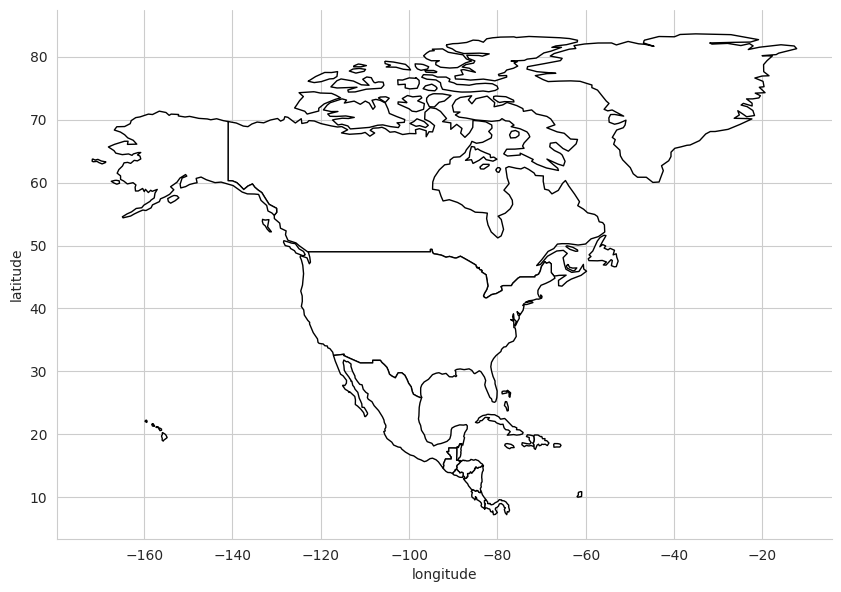

In [ ]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("continent == 'North America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

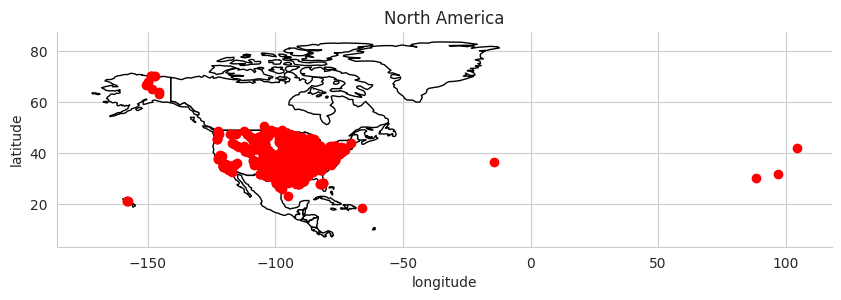

In [ ]:
#Plot the cities onto the map

fig, gax = plt.subplots(figsize=(10,10))

world.query("continent == 'North America'").plot(ax = gax, edgecolor='black', color='white')

gdf.plot(ax=gax, color='red', alpha = 1)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('North America')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

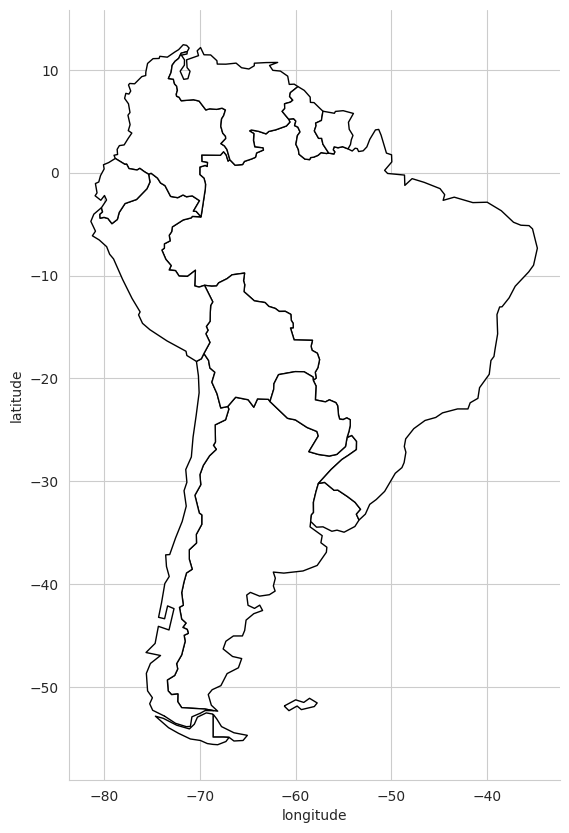

In [ ]:
fig, gax = plt.subplots(figsize=(10,10))

#Plotting the map of South America
world.query("continent == 'South America'").plot(ax=gax, edgecolor='black',color='white')

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

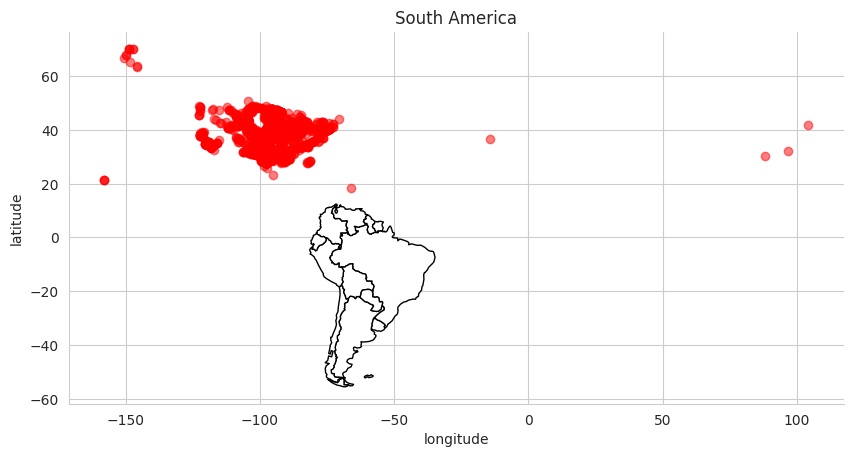

In [ ]:
# Plotting the cities onto the map
fig, gax = plt.subplots(figsize=(10,10))

world.query("continent == 'South America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('South America')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [ ]:
city = oil['Accident City'].tolist()
country = oil['Accident County'].tolist()
latitude = oil['Accident Latitude'].tolist()
longitude = oil['Accident Longitude'].tolist()

new_city = [item for item in city if not(pd.isnull(item)) == True]
new_country = [item for item in country if not(pd.isnull(item)) == True]

print('Accident City:', new_city)
print('Accident County:', new_country)
print('Accident Latitude:', latitude)
print('Accident Longitude:', longitude)


Accident City: ['MCPHERSON', 'RAYMOND', 'SULPHER', 'SUPERIOR', 'SHERMAN', 'NECHE', 'GALENA PARK', 'HULL', 'PASADENA', 'LAKE CHARLES', 'TAFT', 'CHASE', 'CUSHING', 'CUSHING', 'RUSHVILLE', 'PAWNEE', 'SORRENTO', 'GALENA PARK', 'MENAHGA', 'GOWANDA', 'CARSON', 'ELLIS', 'PRINCETON', 'AURORA', 'HARTFORD', 'TAFT', 'GREENSBURG', 'COLLINS', 'EL DORADO', 'PRINCETON', 'CUT OFF', 'PORT ARTHUR', 'DICKINSON', 'HARPER', 'MILWAUKEE', 'EL DORADO', 'LAKE ARTHUR', 'BATON ROUGE', 'LINCOLN', 'WAYNE', 'KANSAS CITY', 'LINDEN', 'LONGVIEW', 'MCCAMEY', 'BIG SPRING', 'SPOKANE', 'COUNCIL BLUFFS', 'POND CREEK', 'LONGVIEW', 'CLEARBROOK', 'HAYNE', 'SULPHUR', 'SORRENTO', 'CARROLLTON', 'KANSAS CITY', 'LONGVIEW', 'CORSICANA', 'SUPERIOR', 'MILFORD', 'COMYN', 'HOBBS', 'WHITE OAK', 'SACRAMENTO', 'CUSHING', 'METTLER', 'MOKENA', 'TEXAS CITY', 'JACKSON', 'WESTLAKE', 'CUSHING', 'BATON ROUGE', 'PHILADELPHIA', 'BORGER', 'ST PETERSBURG', 'SULPHUR', 'BOURBONNAIS', 'SALISBURY', 'CHARLOTTE COURTHOUSE', 'GOWER', 'TULSA', 'ROBERTSON', 

In [ ]:
df1 = oil[['Accident Latitude', 'Accident Longitude']]
print(df1)

      Accident Latitude  Accident Longitude
0             38.670700          -97.781230
1             43.940280          -70.493360
2             30.182400          -93.352400
3             46.689300          -92.061200
4             33.582660          -96.648810
...                 ...                 ...
2790          39.517036          -93.486055
2791          30.332597          -91.274491
2792          35.565292          -96.454956
2793          40.631074          -80.440463
2794          29.305410          -97.400301

[2795 rows x 2 columns]


**Conclusion**

By utilizing data analysis, we gain valuable insights into the causes of oil spills, enabling us to implement effective measures for their reduction. Our visualizations have revealed that equipment failure stands out as the primary factor contributing to oil spillage. Furthermore, the data highlights the "Teppco Crude Pipeline" as the leading contributor to oil spills. By comparing the associated financial and environmental costs, we gain a deeper understanding of the extent of our losses. This comprehensive analysis not only enhances our understanding of the current situation but also equips us With the necessary knowledge to proactively prepare for the future through preventive measures.